<header style="width:100%;position:relative">
  <div style="width:80%;float:right;">
    <h1>False Political Claim Detection</h1>
    <h3>Visualización de Datos Procesados</h3>
    <h5>Grupo 2</h5>
  </div>
        <img style="width:15%;" src="./images/logo.jpg" alt="UPM" />
</header>

# Índice

1. [Importar Librerías y Cargar Datos Procesados](#1.-Importar-Librerías-y-Cargar-Datos-Procesados)  
2. [Exploracion Inicial de los Datos](#2.-Exploracion-Inicial-de-los-Datos)  
3. [Visualizacion de la Distribucion de la Variable Objetivo](#3.-Visualizacion-de-la-Distribucion-de-la-Variable-Objetivo)  
4. [Analisis de Caracteristicas Textuales](#4.-Analisis-de-Caracteristicas-Textuales)  
5. [Analisis de Entidades Nombradas](#5.-Analisis-de-Entidades-Nombradas)  
6. [Analisis de Sentimientos](#6.-Analisis-de-Sentimientos)  
7. [Visualizacion de Caracteristicas Categoricas](#7.-Visualizacion-de-Caracteristicas-Categoricas)  
8. [Distribucion Geografica de los Datos](#8.-Distribucion-Geografica-de-los-Datos)  
9. [Analisis de Afiliacion Politica](#9.-Analisis-de-Afiliacion-Politica)  
10. [Correlacion entre Variables y la Prediccion](#10.-Correlacion-entre-Variables-y-la-Prediccion)
11. [Conclusiones](#11.-Conclusiones)
12. [Referencias](#12.-Referencias)

# 1. Importar Librerías y Cargar Datos Procesados

In [7]:
# Importación de librerías básicas para el análisis de datos
import pandas as pd
import numpy as np

# Importación de librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configuración para visualización
plt.style.use('ggplot')
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Para procesamiento de texto y visualización
from wordcloud import WordCloud
import re
from collections import Counter

# Para mapas
import geopandas as gpd
import folium

# Configurar pandas para mostrar más columnas
pd.set_option('display.max_columns', None)

In [8]:
# Cargar los datos procesados
train_data = pd.read_csv('./formated/train_exportado.csv')
test_data = pd.read_csv('./formated/test_exportado.csv')

print(f"Dimensiones del conjunto de entrenamiento: {train_data.shape}")
print(f"Dimensiones del conjunto de prueba: {test_data.shape}")

Dimensiones del conjunto de entrenamiento: (8950, 32)
Dimensiones del conjunto de prueba: (3836, 31)


# 2. Exploracion Inicial de los Datos
En esta sección realizaremos un análisis exploratorio inicial para entender la estructura de los datos procesados.

In [12]:
# Mostrar las primeras filas del conjunto de datos de entrenamiento
train_data.head()

,id,label,statement,statement-raw,statement-lemmatize,statement-ner,feelings,subject-ciencia_y_tecnologia,subject-economia_y_finanzas,subject-educacion,subject-medio_ambiente_y_energia,subject-otros,subject-politica_y_gobierno,subject-relaciones_internacionales,subject-salud_y_bienestar,subject-seguridad_y_justicia,subject-sociedad_y_cultura,subject-trabajo_y_empleo,speaker_grouped,speaker_grouped_cod,speaker_job_grouped,speaker_job_grouped_cod,state_info_grouped,state_info_grouped_cod,party_group,party_group_cod,speaker_job-llm,speaker_job_cod-llm,state_info-llm,state_info_cod-llm,party_affiliation-llm,party_affiliation_cod-llm
0,81f884c64a7,1,China is in the South China Sea and (building)...,china is south china sea military fortress lik...,china be south china sea military fortress lik...,china south china sea,0.4215,0,0,0,0,0,0,1,0,0,0,0,donald-trump,2,president,13,new york,7,republican,6,president,13,new york,7,republican,6
1,30c2723a188,0,With the resources it takes to execute just ov...,resources it takes execute months iraq war we ...,resources it take execute months iraq war we f...,just over three months the iraq war bush,-0.4767,0,0,0,0,0,0,0,1,0,0,0,other_speakers,7,federal_legislator_senate,4,other_state_info,10,democrat,0,federal_legislator_senate,4,other,10,democrat,0
2,6936b216e5d,0,The (Wisconsin) governor has proposed tax give...,wisconsin governor proposed tax giveaways corp...,wisconsin governor propose tax giveaways corpo...,wisconsin,0.0000,0,1,0,0,1,0,0,0,0,1,0,other_speakers,7,other_speaker_job,9,washington dc,14,democrat,0,governor,5,washington dc,14,democrat,0
3,b5cd9195738,1,Says her representation of an ex-boyfriend who...,says her representation ex boyfriend who was m...,say her representation ex boyfriend who be my ...,(no entities),0.4939,0,0,1,0,0,1,0,0,1,1,0,other_speakers,7,other_speaker_job,9,other_state_info,10,independent_None,1,legal_professional,6,other,10,official,3
4,84f8dac7737,0,At protests in Wisconsin against proposed coll...,protests wisconsin proposed collective bargain...,protests wisconsin propose collective bargaini...,wisconsin,-0.5994,0,1,0,0,0,0,0,1,0,0,1,other_speakers,7,other_speaker_job,9,wisconsin,15,republican,6,political_organization,12,wisconsin,15,republican,6


In [14]:
# Información general sobre los tipos de datos
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  8950 non-null   object 
 1   label                               8950 non-null   int64  
 2   statement                           8950 non-null   object 
 3   statement-raw                       8950 non-null   object 
 4   statement-lemmatize                 8950 non-null   object 
 5   statement-ner                       8950 non-null   object 
 6   feelings                            8950 non-null   float64
 7   subject-ciencia_y_tecnologia        8950 non-null   int64  
 8   subject-economia_y_finanzas         8950 non-null   int64  
 9   subject-educacion                   8950 non-null   int64  
 10  subject-medio_ambiente_y_energia    8950 non-null   int64  
 11  subject-otros                       8950 no

In [16]:
# Estadísticas descriptivas básicas para variables numéricas
train_data.describe()

,label,feelings,subject-ciencia_y_tecnologia,subject-economia_y_finanzas,subject-educacion,subject-medio_ambiente_y_energia,subject-otros,subject-politica_y_gobierno,subject-relaciones_internacionales,subject-salud_y_bienestar,subject-seguridad_y_justicia,subject-sociedad_y_cultura,subject-trabajo_y_empleo,speaker_grouped_cod,speaker_job_grouped_cod,state_info_grouped_cod,party_group_cod,speaker_job_cod-llm,state_info_cod-llm,party_affiliation_cod-llm
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.00000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.647486,-0.011253,0.008380,0.371173,0.08324,0.065028,0.119330,0.309497,0.092179,0.166592,0.161341,0.191397,0.124581,6.337989,8.694525,8.556983,3.005251,9.272291,8.226257,3.497877
std,0.477780,0.388685,0.091162,0.483146,0.27626,0.246589,0.324194,0.462312,0.289294,0.372632,0.367866,0.393423,0.330262,1.974035,3.734136,3.940252,2.783722,4.177900,4.153643,2.741711
min,0.000000,-0.972300,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.296000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,5.000000,6.000000,0.000000,5.000000,4.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,9.000000,10.000000,1.000000,9.000000,10.000000,4.000000
75%,1.000000,0.273200,0.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,9.000000,11.000000,6.000000,12.000000,11.000000,6.000000
max,1.000000,0.942300,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,18.000000,15.000000,7.000000,18.000000,15.000000,7.000000


In [18]:
# Verificar valores nulos
missing_values = train_data.isnull().sum()
print("Valores nulos por columna:")
print(missing_values[missing_values > 0])

# Si no hay valores nulos, mostrar mensaje
if sum(missing_values) == 0:
    print("No hay valores nulos en el conjunto de datos.")

Valores nulos por columna:
Series([], dtype: int64)
No hay valores nulos en el conjunto de datos.


In [20]:
# Explorar las columnas para entender mejor su naturaleza
column_types = pd.DataFrame({
    'Columna': train_data.columns,
    'Tipo': train_data.dtypes,
    'Valores únicos': [train_data[col].nunique() for col in train_data.columns]
})

column_types

,Columna,Tipo,Valores únicos
id,id,object,8950
label,label,int64,2
statement,statement,object,8939
statement-raw,statement-raw,object,8933
statement-lemmatize,statement-lemmatize,object,8931
statement-ner,statement-ner,object,7010
feelings,feelings,float64,734
subject-ciencia_y_tecnologia,subject-ciencia_y_tecnologia,int64,2
subject-economia_y_finanzas,subject-economia_y_finanzas,int64,2
subject-educacion,subject-educacion,int64,2


# 3. Visualizacion de la Distribucion de la Variable Objetivo
Vamos a visualizar la distribución de la variable objetivo 'label' y su relación con otras variables clave del dataset.

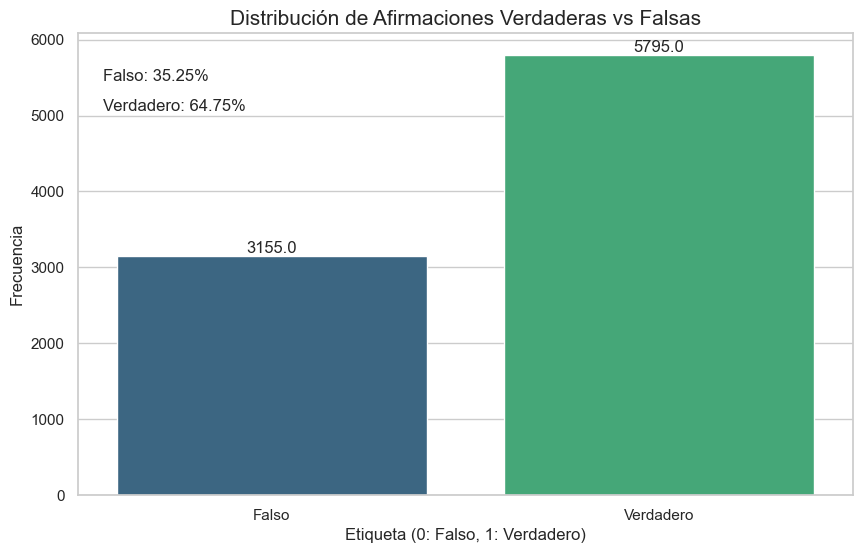

In [23]:
# Crear un gráfico de la distribución de la variable objetivo
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='label', hue='label', data=train_data, palette='viridis', legend=False)

# Añadir etiquetas a las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

# Personalizar el gráfico
plt.title('Distribución de Afirmaciones Verdaderas vs Falsas', fontsize=15)
plt.xlabel('Etiqueta (0: Falso, 1: Verdadero)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks([0, 1], ['Falso', 'Verdadero'])

# Calcular y mostrar el porcentaje
total = len(train_data)
false_percent = train_data[train_data['label'] == 0].shape[0] / total * 100
true_percent = train_data[train_data['label'] == 1].shape[0] / total * 100

plt.figtext(0.15, 0.8, f'Falso: {false_percent:.2f}%', fontsize=12)
plt.figtext(0.15, 0.75, f'Verdadero: {true_percent:.2f}%', fontsize=12)

plt.show()

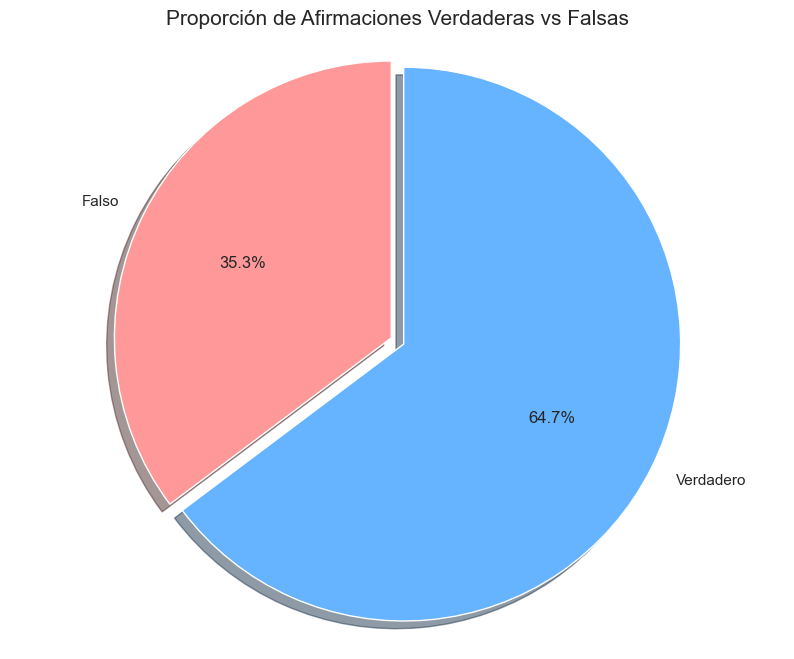

In [25]:
# Crear un gráfico circular para visualizar la proporción
labels = ['Falso', 'Verdadero']
sizes = [
    train_data[train_data['label'] == 0].shape[0],
    train_data[train_data['label'] == 1].shape[0]
]
explode = (0.05, 0)  # Resaltar el segmento de afirmaciones falsas

plt.figure(figsize=(10, 8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['#ff9999','#66b3ff'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Proporción de Afirmaciones Verdaderas vs Falsas', fontsize=15)
plt.show()

# 4. Analisis de Caracteristicas Textuales
En esta sección, analizaremos las características textuales de las afirmaciones, como la longitud de las afirmaciones, frecuencia de palabras, y diferencias lingüísticas entre afirmaciones verdaderas y falsas.

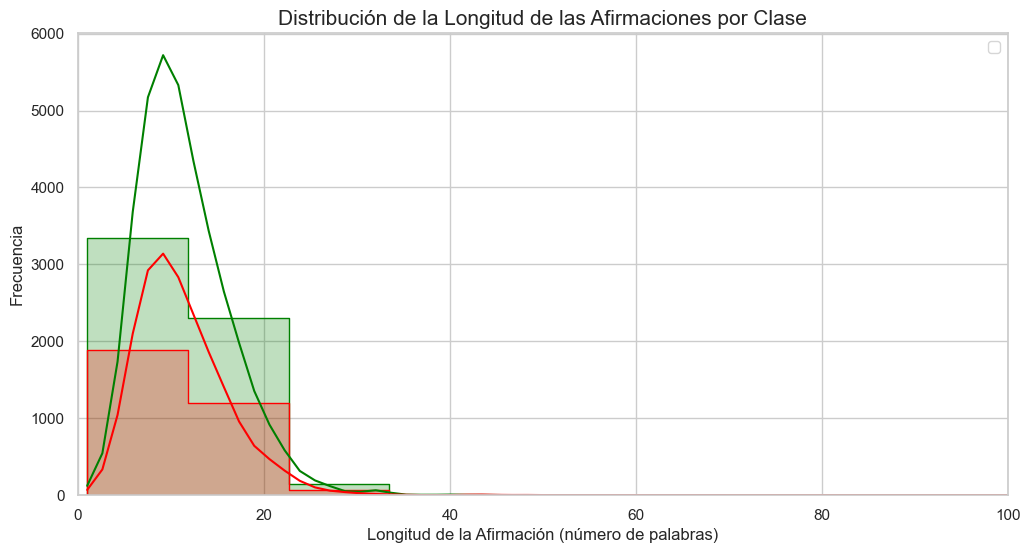

In [32]:
# Calcular la longitud de las afirmaciones
train_data['statement_length'] = train_data['statement-raw'].apply(lambda x: len(x.split()))

# Analizar la longitud de afirmaciones por clase
plt.figure(figsize=(12, 6))

# Crear el histograma y especificar la paleta de colores explícitamente mediante un diccionario
ax = sns.histplot(data=train_data, x='statement_length', hue='label', bins=30, kde=True, 
                 element="step", common_norm=False, palette={0: 'red', 1: 'green'})

# Modificar la leyenda para usar las etiquetas 'Falso' y 'Verdadero' en lugar de 0 y 1
legend_labels = {0: 'Falso', 1: 'Verdadero'}
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [legend_labels[int(float(label))] for label in labels])

plt.title('Distribución de la Longitud de las Afirmaciones por Clase', fontsize=15)
plt.xlabel('Longitud de la Afirmación (número de palabras)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xlim(0, 100)  # Ajustar para mejor visualización
plt.show()

In [36]:
# Estadísticas descriptivas de la longitud por clase
length_stats = train_data.groupby('label')['statement_length'].describe()
print("Estadísticas de longitud por clase:")
print(length_stats)

# Prueba t para ver si hay diferencia significativa
from scipy import stats
false_lengths = train_data[train_data['label'] == 0]['statement_length']
true_lengths = train_data[train_data['label'] == 1]['statement_length']
t_stat, p_val = stats.ttest_ind(false_lengths, true_lengths, equal_var=False)
print(f"\nPrueba t para diferencia en longitud entre clases:")
print(f"t-estadístico: {t_stat:.4f}")
print(f"p-valor: {p_val:.4f}")
print(f"Diferencia significativa (p<0.05): {'Sí' if p_val < 0.05 else 'No'}")

Estadísticas de longitud por clase:
        count       mean       std  min  25%   50%   75%    max
label                                                          
0      3155.0  11.324564  7.380922  1.0  8.0  10.0  14.0  326.0
1      5795.0  11.439517  5.533148  1.0  8.0  11.0  14.0  209.0

Prueba t para diferencia en longitud entre clases:
t-estadístico: -0.7655
p-valor: 0.4440
Diferencia significativa (p<0.05): No


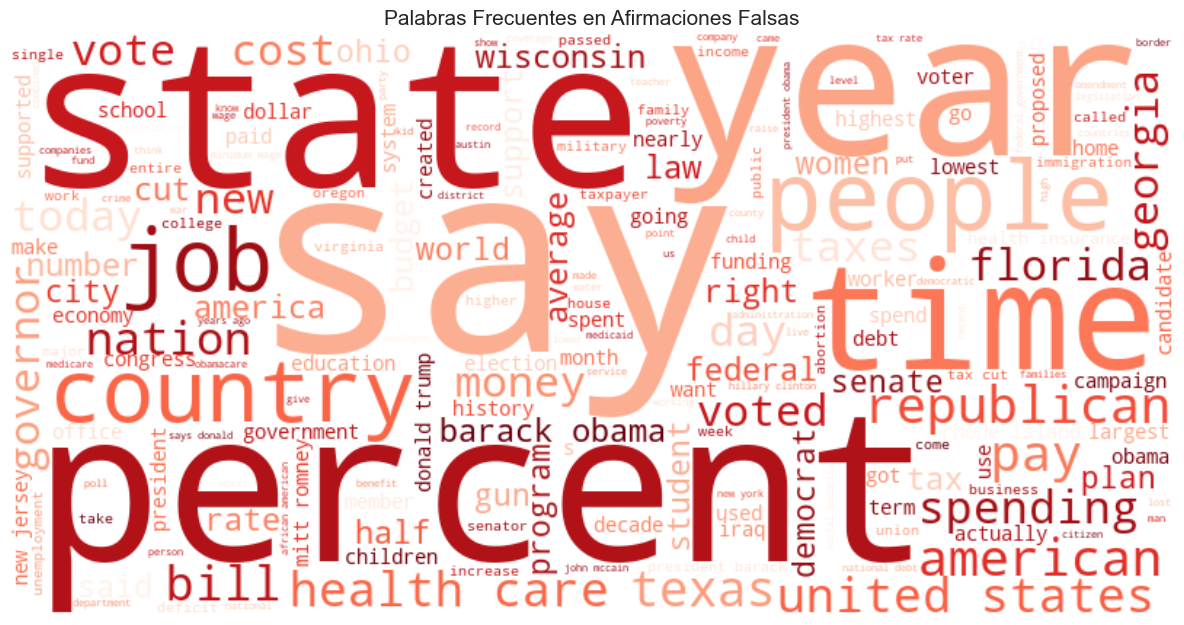

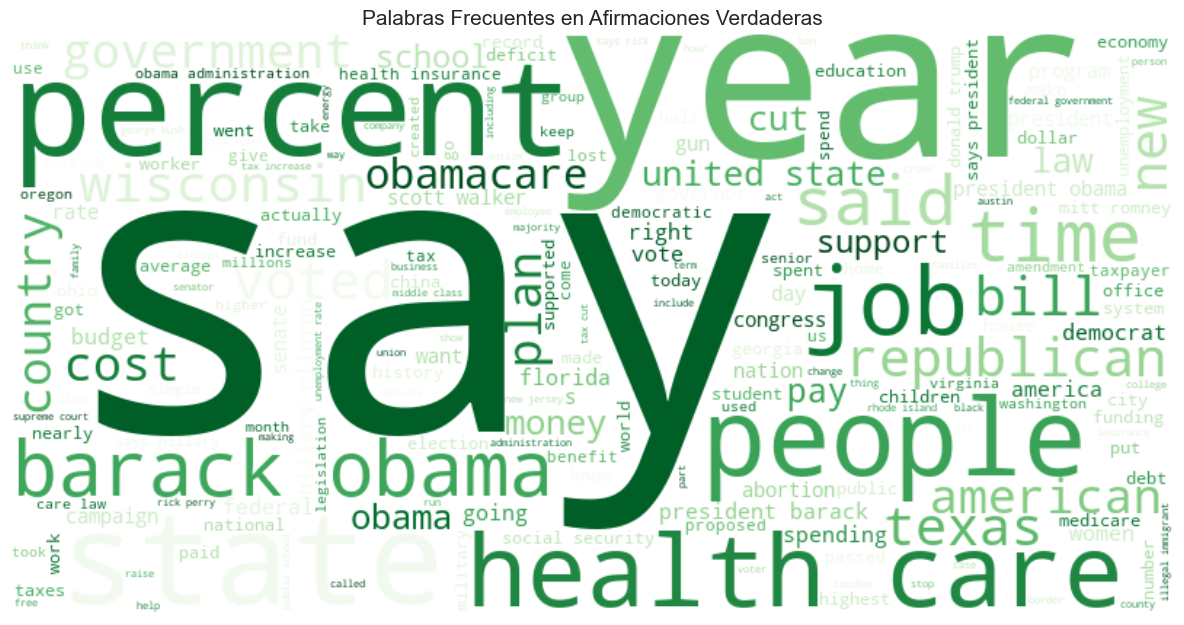

In [38]:
# Función para crear nubes de palabras
def generate_wordcloud(text, title, colormap='viridis'):
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white',
        colormap=colormap,
        max_words=200,
        contour_width=3
    ).generate(text)
    
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=15)
    plt.tight_layout()
    plt.show()

# Generar nubes de palabras para afirmaciones verdaderas y falsas
false_statements = ' '.join(train_data[train_data['label'] == 0]['statement-raw'].fillna(''))
true_statements = ' '.join(train_data[train_data['label'] == 1]['statement-raw'].fillna(''))

# Crear nubes de palabras
generate_wordcloud(false_statements, 'Palabras Frecuentes en Afirmaciones Falsas', 'Reds')
generate_wordcloud(true_statements, 'Palabras Frecuentes en Afirmaciones Verdaderas', 'Greens')

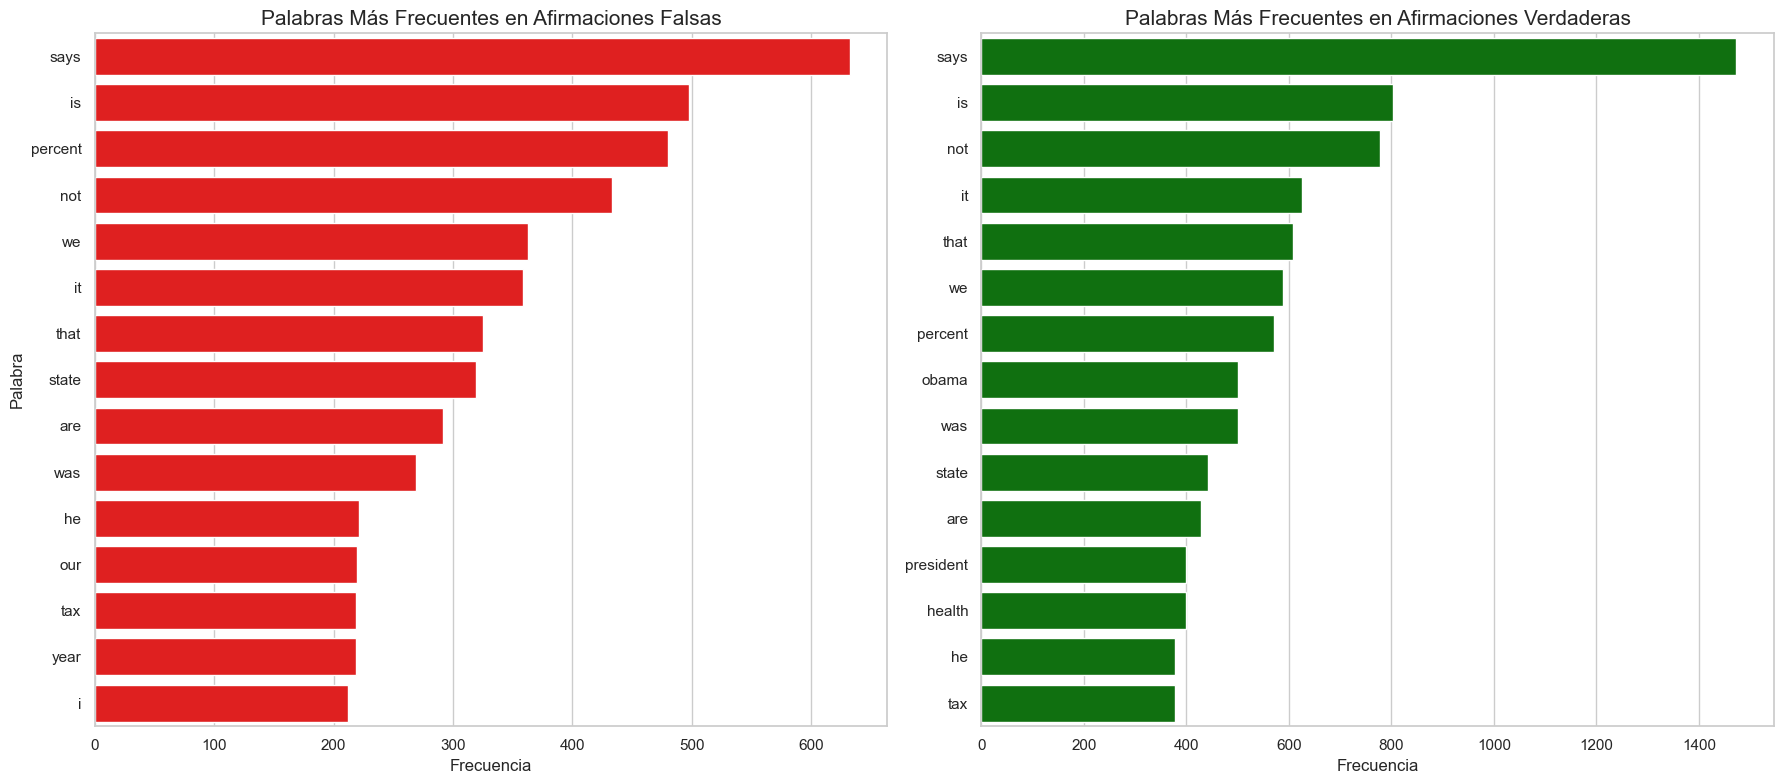

In [40]:
# Función para extraer las palabras más comunes por clase
def get_top_words(text_series, n=20):
    all_words = ' '.join(text_series.fillna('').astype(str)).lower()
    words = re.findall(r'\b\w+\b', all_words)
    return Counter(words).most_common(n)

# Palabras más comunes en afirmaciones falsas
false_top_words = get_top_words(train_data[train_data['label'] == 0]['statement-raw'])
false_words_df = pd.DataFrame(false_top_words, columns=['Palabra', 'Frecuencia'])

# Palabras más comunes en afirmaciones verdaderas
true_top_words = get_top_words(train_data[train_data['label'] == 1]['statement-raw'])
true_words_df = pd.DataFrame(true_top_words, columns=['Palabra', 'Frecuencia'])

# Visualizar las palabras más comunes
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Afirmaciones falsas
sns.barplot(x='Frecuencia', y='Palabra', data=false_words_df.head(15), ax=ax[0], color='red')
ax[0].set_title('Palabras Más Frecuentes en Afirmaciones Falsas', fontsize=15)
ax[0].set_xlabel('Frecuencia', fontsize=12)
ax[0].set_ylabel('Palabra', fontsize=12)

# Afirmaciones verdaderas
sns.barplot(x='Frecuencia', y='Palabra', data=true_words_df.head(15), ax=ax[1], color='green')
ax[1].set_title('Palabras Más Frecuentes en Afirmaciones Verdaderas', fontsize=15)
ax[1].set_xlabel('Frecuencia', fontsize=12)
ax[1].set_ylabel('')  # Eliminar etiqueta duplicada

plt.tight_layout()
plt.show()

# 5. Analisis de Entidades Nombradas
Ahora analizaremos visualmente la información extraída en el proceso de reconocimiento de entidades nombradas (NER).

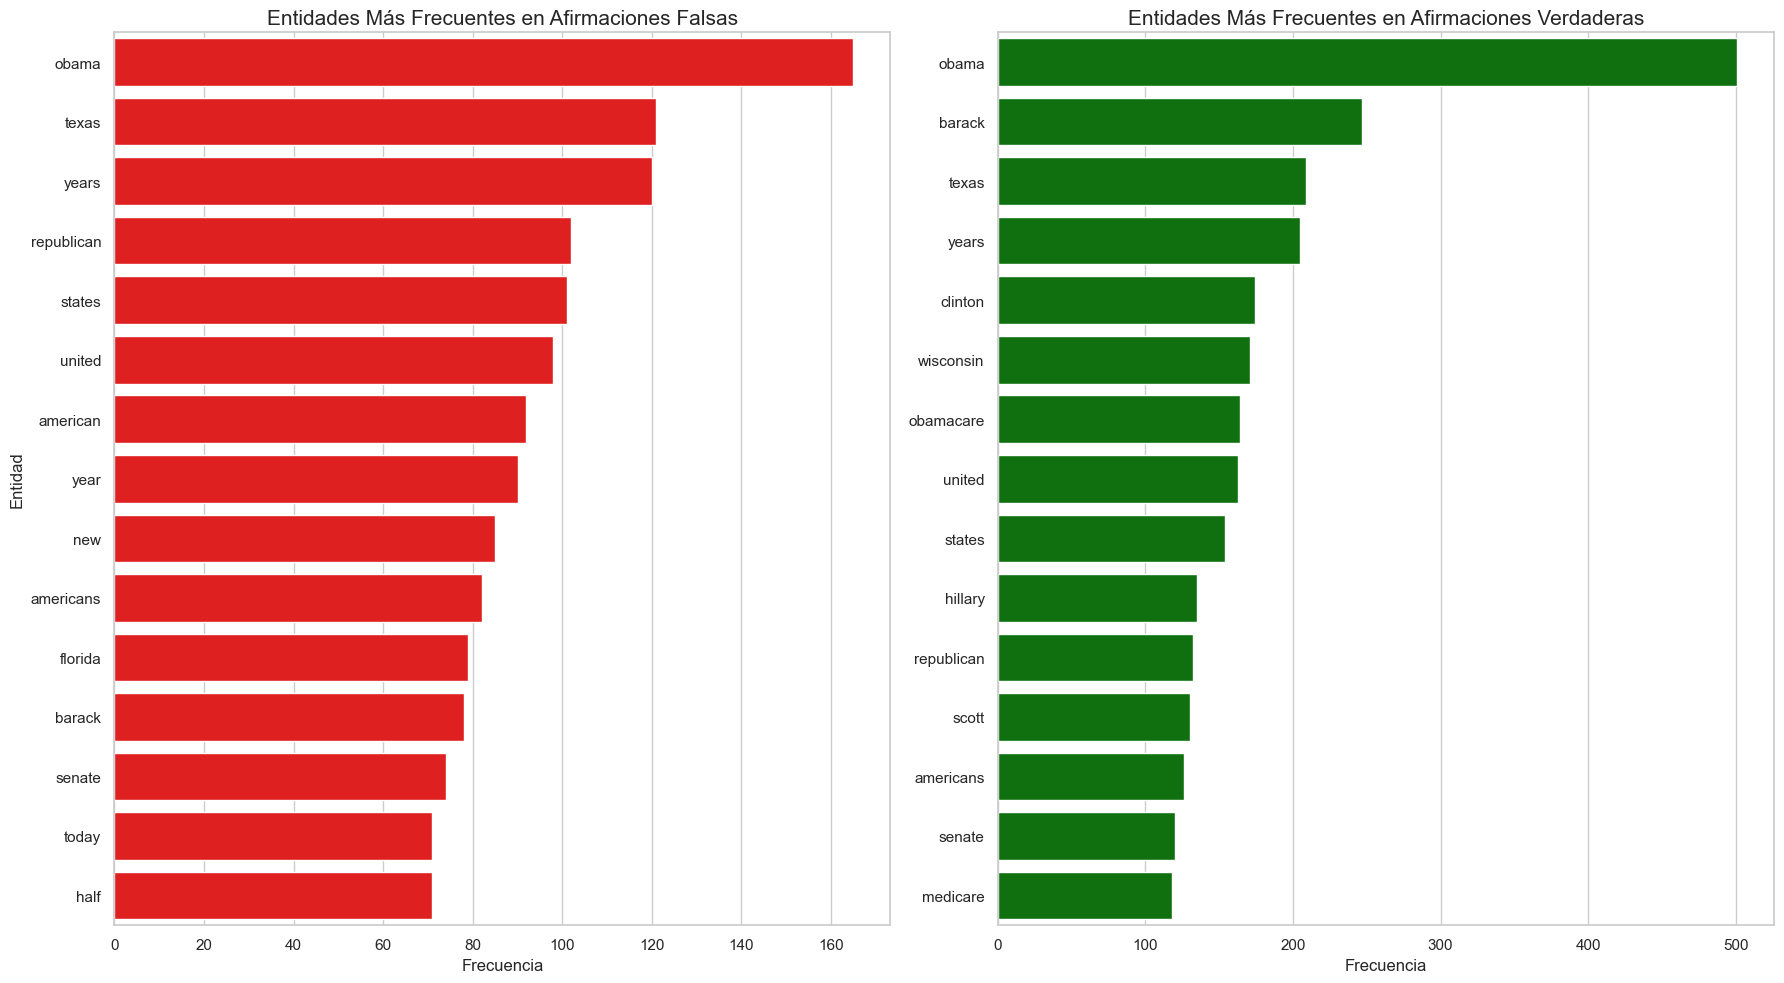

In [47]:
# Verificar que existe la columna de entidades nombradas
if 'statement-ner' in train_data.columns:
    # Contar la frecuencia de entidades en afirmaciones falsas
    false_ner = ' '.join(train_data[train_data['label'] == 0]['statement-ner'].fillna(''))
    false_entities = re.findall(r'\b\w+\b', false_ner)
    false_entity_counts = Counter(false_entities)
    
    # Eliminar 'no' y 'entities' de las entidades falsas
    if 'no' in false_entity_counts:
        del false_entity_counts['no']
    if 'entities' in false_entity_counts:
        del false_entity_counts['entities']
    
    # Obtener las 15 más frecuentes después de filtrar
    false_entity_counts = false_entity_counts.most_common(15)
    false_entity_df = pd.DataFrame(false_entity_counts, columns=['Entidad', 'Frecuencia'])
    
    # Contar la frecuencia de entidades en afirmaciones verdaderas
    true_ner = ' '.join(train_data[train_data['label'] == 1]['statement-ner'].fillna(''))
    true_entities = re.findall(r'\b\w+\b', true_ner)
    true_entity_counts = Counter(true_entities)
    
    # Eliminar 'no' y 'entities' de las entidades verdaderas
    if 'no' in true_entity_counts:
        del true_entity_counts['no']
    if 'entities' in true_entity_counts:
        del true_entity_counts['entities']
    
    # Obtener las 15 más frecuentes después de filtrar
    true_entity_counts = true_entity_counts.most_common(15)
    true_entity_df = pd.DataFrame(true_entity_counts, columns=['Entidad', 'Frecuencia'])
    
    # Visualizar las entidades más comunes
    fig, ax = plt.subplots(1, 2, figsize=(18, 10))
    
    # Entidades en afirmaciones falsas
    sns.barplot(x='Frecuencia', y='Entidad', data=false_entity_df, ax=ax[0], color='red')
    ax[0].set_title('Entidades Más Frecuentes en Afirmaciones Falsas', fontsize=15)
    ax[0].set_xlabel('Frecuencia', fontsize=12)
    ax[0].set_ylabel('Entidad', fontsize=12)
    
    # Entidades en afirmaciones verdaderas
    sns.barplot(x='Frecuencia', y='Entidad', data=true_entity_df, ax=ax[1], color='green')
    ax[1].set_title('Entidades Más Frecuentes en Afirmaciones Verdaderas', fontsize=15)
    ax[1].set_xlabel('Frecuencia', fontsize=12)
    ax[1].set_ylabel('')
    
    plt.tight_layout()
    plt.show()
else:
    print("La columna 'statement-ner' no existe en el conjunto de datos.")

# 6. Analisis de Sentimientos
En esta sección, visualizaremos la distribución de sentimientos en las afirmaciones y su relación con la veracidad.

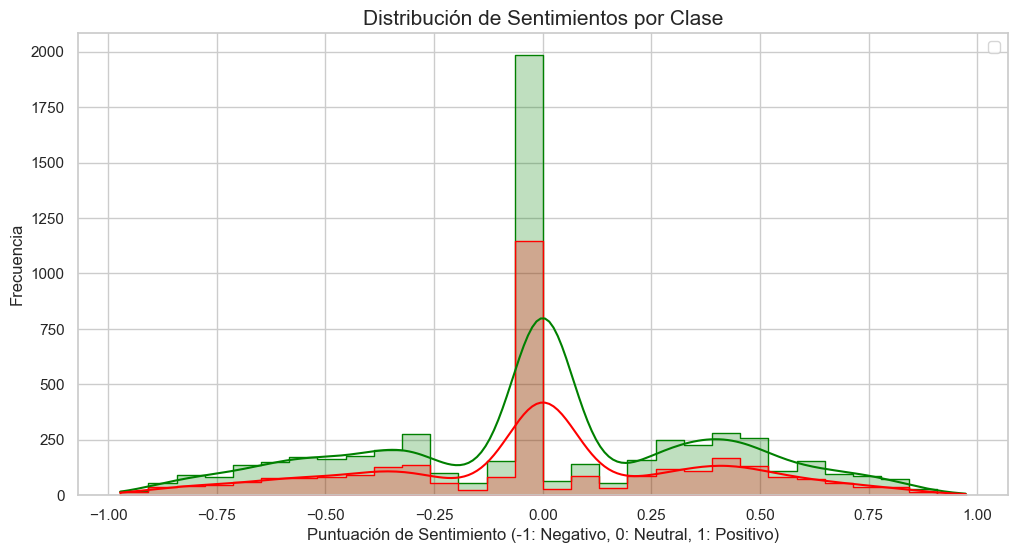

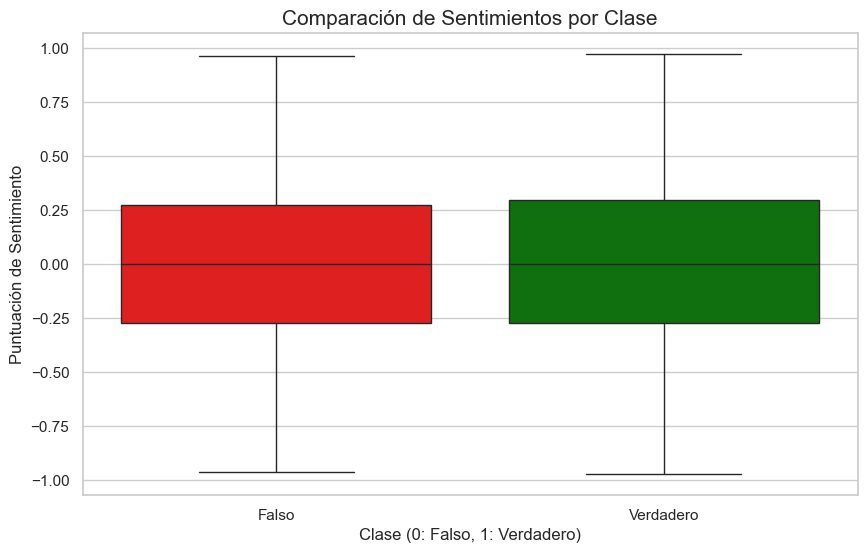

Estadísticas de sentimientos por clase:
        count     mean       std     min     25%  50%     75%     max
label                                                                
0      3155.0  0.00268  0.387273 -0.9607 -0.2732  0.0  0.2732  0.9646
1      5795.0 -0.00049  0.392574 -0.9723 -0.2732  0.0  0.2960  0.9728

Prueba t para diferencia en sentimientos entre clases:
t-estadístico: 0.3682
p-valor: 0.7127
Diferencia significativa (p<0.05): No


In [63]:
# Verificar que existe la columna de sentimientos
if 'feelings' in train_data.columns:
    # Crear un histograma de sentimientos por clase
    plt.figure(figsize=(12, 6))
    
    # Usar el enfoque recomendado por seaborn
    ax = sns.histplot(data=train_data, x='feelings', hue='label', bins=30, kde=True, 
                 element="step", palette={0: 'red', 1: 'green'})
    
    # Corregir la leyenda para mostrar etiquetas descriptivas
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles, ['Falso (0)', 'Verdadero (1)'])
    
    plt.title('Distribución de Sentimientos por Clase', fontsize=15)
    plt.xlabel('Puntuación de Sentimiento (-1: Negativo, 0: Neutral, 1: Positivo)', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.show()
    
    # Crear un diagrama de caja para comparar la distribución de sentimientos
    plt.figure(figsize=(10, 6))
    # Usar la sintaxis actualizada para asignar colores
    sns.boxplot(x='label', y='feelings', data=train_data, hue='label', palette={0: 'red', 1: 'green'}, legend=False)
    plt.title('Comparación de Sentimientos por Clase', fontsize=15)
    plt.xlabel('Clase (0: Falso, 1: Verdadero)', fontsize=12)
    plt.ylabel('Puntuación de Sentimiento', fontsize=12)
    plt.xticks([0, 1], ['Falso', 'Verdadero'])
    plt.show()
    
    # Estadísticas descriptivas de sentimientos por clase
    sentiment_stats = train_data.groupby('label')['feelings'].describe()
    print("Estadísticas de sentimientos por clase:")
    print(sentiment_stats)
    
    # Prueba t para ver si hay diferencia significativa en sentimientos
    false_sentiments = train_data[train_data['label'] == 0]['feelings']
    true_sentiments = train_data[train_data['label'] == 1]['feelings']
    t_stat, p_val = stats.ttest_ind(false_sentiments, true_sentiments, equal_var=False)
    print(f"\nPrueba t para diferencia en sentimientos entre clases:")
    print(f"t-estadístico: {t_stat:.4f}")
    print(f"p-valor: {p_val:.4f}")
    print(f"Diferencia significativa (p<0.05): {'Sí' if p_val < 0.05 else 'No'}")
else:
    print("La columna 'feelings' no existe en el conjunto de datos.")

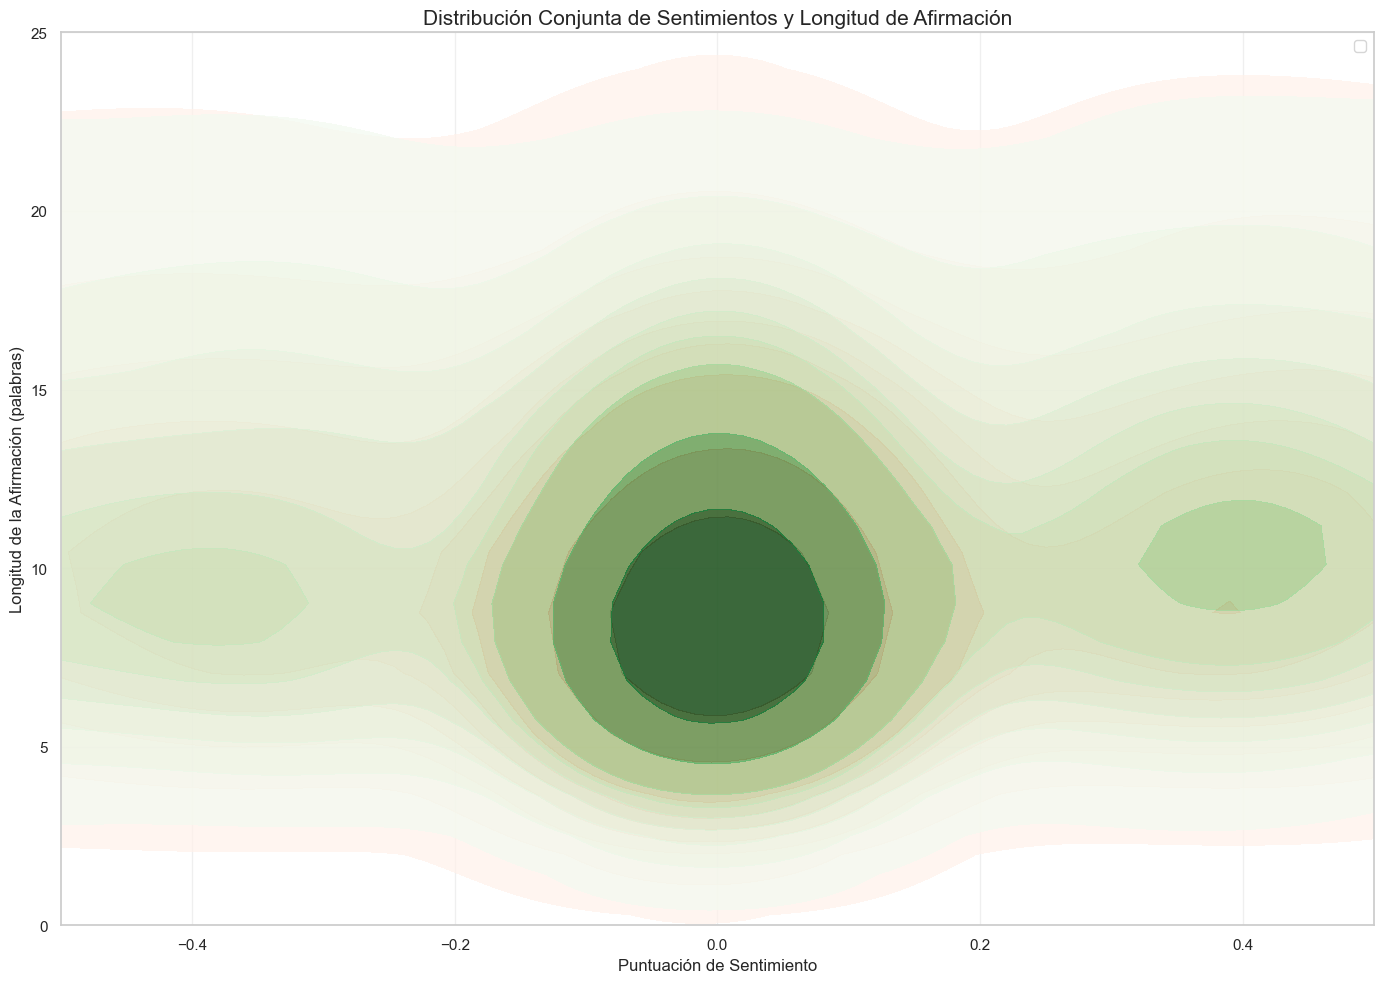

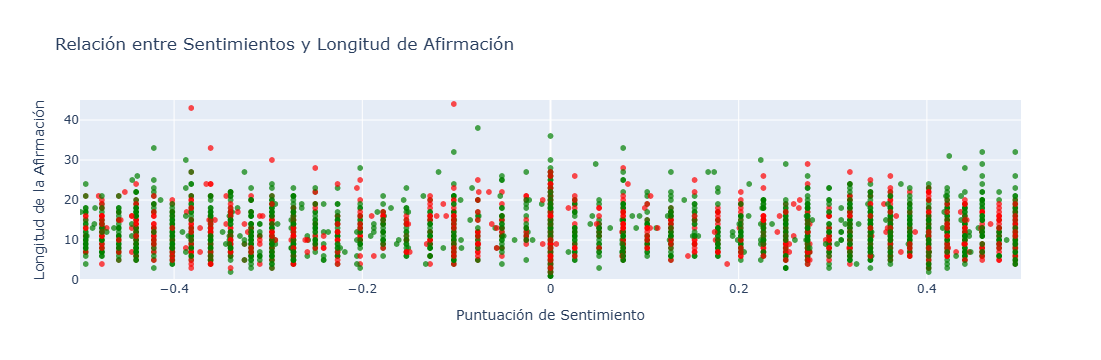

In [77]:
# Si existe la columna de sentimientos, crear un gráfico de densidad 2D
if 'feelings' in train_data.columns:
    # Crear un gráfico de densidad 2D de sentimientos vs longitud de afirmación
    plt.figure(figsize=(14, 10))  # Aumentar el tamaño de la figura
    
    # Afirmaciones falsas
    false_data = train_data[train_data['label'] == 0]
    sns.kdeplot(x='feelings', y='statement_length', data=false_data, 
                cmap="Reds", fill=True, thresh=0.05, alpha=0.7)
    
    # Afirmaciones verdaderas
    true_data = train_data[train_data['label'] == 1]
    sns.kdeplot(x='feelings', y='statement_length', data=true_data, 
                cmap="Greens", fill=True, thresh=0.05, alpha=0.7)
    
    # Ajustar los límites de los ejes para que sean más pequeños
    plt.xlim(-0.5, 0.5)  # Ajusta estos valores según tus datos
    plt.ylim(0, 25)      # Ajusta estos valores según tus datos
    
    plt.title('Distribución Conjunta de Sentimientos y Longitud de Afirmación', fontsize=15)
    plt.xlabel('Puntuación de Sentimiento', fontsize=12)
    plt.ylabel('Longitud de la Afirmación (palabras)', fontsize=12)
    plt.legend(['Falso', 'Verdadero'])
    plt.grid(True, alpha=0.3)  # Añadir una cuadrícula sutil para mejorar la legibilidad
    plt.tight_layout()
    plt.show()
    
    # Crear un gráfico interactivo con Plotly
    fig = px.scatter(train_data, x='feelings', y='statement_length', color='label', 
                     color_continuous_scale=['red', 'green'], opacity=0.7,
                     labels={'feelings': 'Puntuación de Sentimiento', 
                            'statement_length': 'Longitud de la Afirmación',
                            'label': 'Clase'},
                     title='Relación entre Sentimientos y Longitud de Afirmación')
    
    # Ajustar los límites de los ejes para Plotly
    fig.update_layout(
        xaxis=dict(range=[-0.5, 0.5]),  # Ajusta estos valores según tus datos
        yaxis=dict(range=[0, 45]),      # Ajusta estos valores según tus datos
        coloraxis_showscale=False
    )
    fig.show()
else:
    print("La columna 'feelings' no existe en el conjunto de datos.")

# 7. Visualizacion de Caracteristicas Categoricas
En esta sección, exploraremos la relación entre las características categóricas y la variable objetivo.

In [81]:
# Función para visualizar la relación entre variables categóricas y la clase
def plot_categorical_by_label(df, col_name, title, top_n=10):
    # Verificar si la columna existe
    if col_name not in df.columns:
        print(f"La columna '{col_name}' no existe en el conjunto de datos.")
        return
    
    # Crear un DataFrame con el conteo por categoría y clase
    counts = df.groupby([col_name, 'label']).size().reset_index(name='count')
    pivot = counts.pivot(index=col_name, columns='label', values='count').fillna(0)
    pivot['total'] = pivot.sum(axis=1)
    pivot['false_ratio'] = pivot[0] / pivot['total']
    pivot['true_ratio'] = pivot[1] / pivot['total']
    pivot = pivot.sort_values('total', ascending=False).head(top_n)
    
    # Crear un gráfico de barras apiladas
    fig, ax = plt.subplots(figsize=(12, 8))
    pivot[[0, 1]].plot(kind='bar', stacked=True, color=['red', 'green'], ax=ax)
    plt.title(title, fontsize=15)
    plt.xlabel('Categoría', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.legend(['Falso', 'Verdadero'])
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Gráfico de proporciones
    fig, ax = plt.subplots(figsize=(12, 6))
    pivot[['false_ratio', 'true_ratio']].plot(kind='bar', stacked=True, color=['red', 'green'], ax=ax)
    plt.title(f'Proporción de Afirmaciones Falsas/Verdaderas por {title}', fontsize=15)
    plt.xlabel('Categoría', fontsize=12)
    plt.ylabel('Proporción', fontsize=12)
    plt.legend(['Falso', 'Verdadero'])
    plt.xticks(rotation=45, ha='right')
    
    # Añadir etiquetas de porcentaje
    for i, p in enumerate(ax.patches):
        width, height = p.get_width(), p.get_height()
        x, y = p.get_x(), p.get_y()
        if height > 0.05:  # Solo mostrar etiquetas para segmentos grandes
            ax.text(x + width/2, y + height/2, f'{height:.1%}', ha='center', va='center')
    
    plt.tight_layout()
    plt.show()
    
    return pivot

In [89]:
# Función para analizar temas individuales en lugar de combinaciones
def plot_individual_subjects(df, subject_cols, top_n=15):
    # Crear un DataFrame para almacenar las estadísticas de cada tema
    subject_stats = []
    
    for col in subject_cols:
        subject_name = col.replace('subject-', '')
        false_count = df[(df[col] == 1) & (df['label'] == 0)].shape[0]
        true_count = df[(df[col] == 1) & (df['label'] == 1)].shape[0]
        total_count = false_count + true_count
        
        if total_count > 0:  # Evitar divisiones por cero
            false_ratio = false_count / total_count
            true_ratio = true_count / total_count
            
            subject_stats.append({
                'subject': subject_name,
                'false_count': false_count,
                'true_count': true_count,
                'total_count': total_count,
                'false_ratio': false_ratio,
                'true_ratio': true_ratio
            })
    
    # Convertir a DataFrame y ordenar por total
    subject_df = pd.DataFrame(subject_stats)
    top_subjects = subject_df.sort_values('total_count', ascending=False).head(top_n)
    
    # Crear gráfico de barras apiladas (frecuencia absoluta)
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Crear las barras para cada categoría
    bar_true = ax.bar(top_subjects['subject'], top_subjects['true_count'], 
                     label='Verdadero', color='green')
    bar_false = ax.bar(top_subjects['subject'], top_subjects['false_count'], 
                      bottom=top_subjects['true_count'], label='Falso', color='red')
    
    # Personalizar el gráfico
    plt.title('Frecuencia de Afirmaciones por Tema', fontsize=15)
    plt.xlabel('Tema', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Crear gráfico de proporciones
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Barras apiladas para proporciones
    bar_true_ratio = ax.bar(top_subjects['subject'], top_subjects['true_ratio'], 
                          label='Verdadero', color='green')
    bar_false_ratio = ax.bar(top_subjects['subject'], top_subjects['false_ratio'], 
                           bottom=top_subjects['true_ratio'], label='Falso', color='red')
    
    # Personalizar el gráfico
    plt.title('Proporción de Afirmaciones Verdaderas/Falsas por Tema', fontsize=15)
    plt.xlabel('Tema', fontsize=12)
    plt.ylabel('Proporción', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    
    # Añadir etiquetas de porcentaje
    for i, p in enumerate(top_subjects['false_ratio']):
        if p > 0.05:  # Solo mostrar para segmentos significativos
            ax.text(i, top_subjects['true_ratio'].iloc[i] + p/2, f'{p:.1%}', 
                   ha='center', va='center')
    
    for i, p in enumerate(top_subjects['true_ratio']):
        if p > 0.05:  # Solo mostrar para segmentos significativos
            ax.text(i, p/2, f'{p:.1%}', 
                   ha='center', va='center')
    
    plt.tight_layout()
    plt.show()
    
    return subject_df

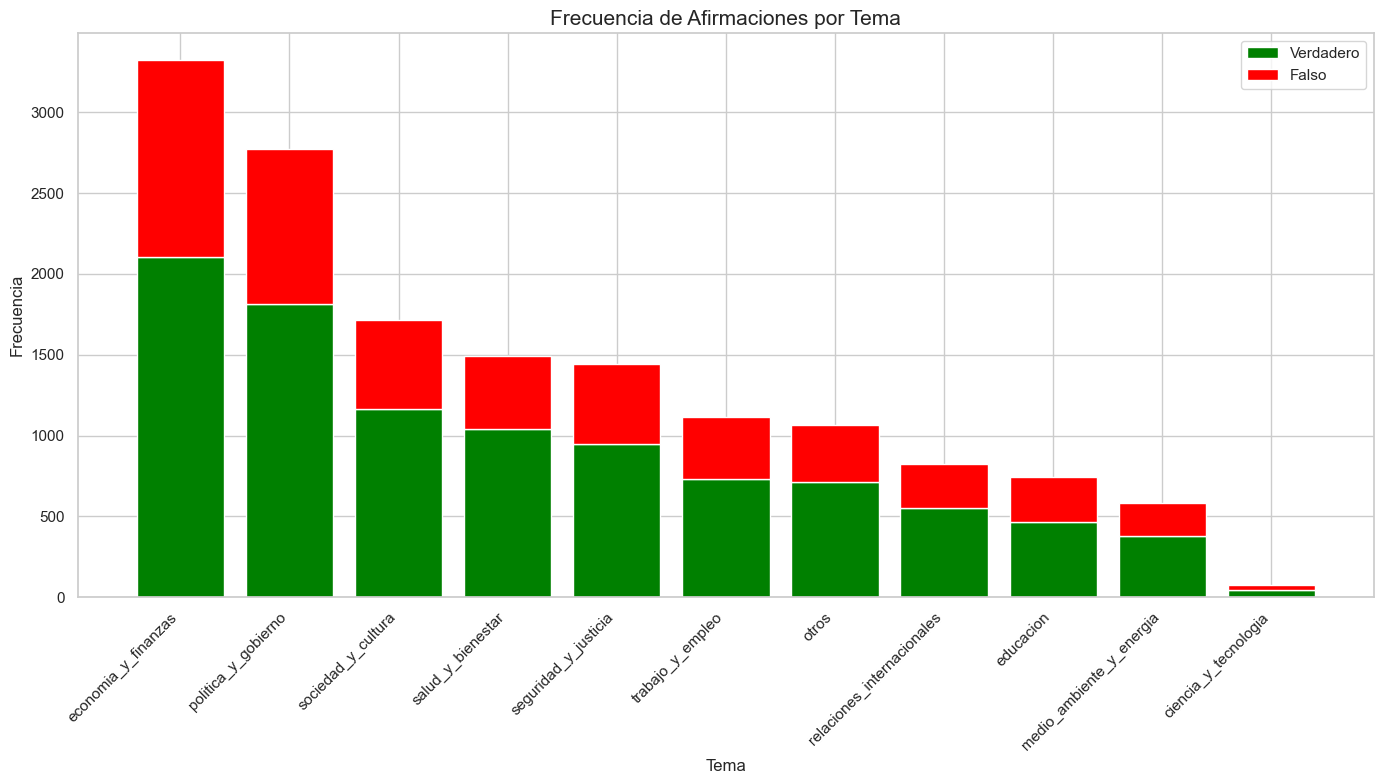

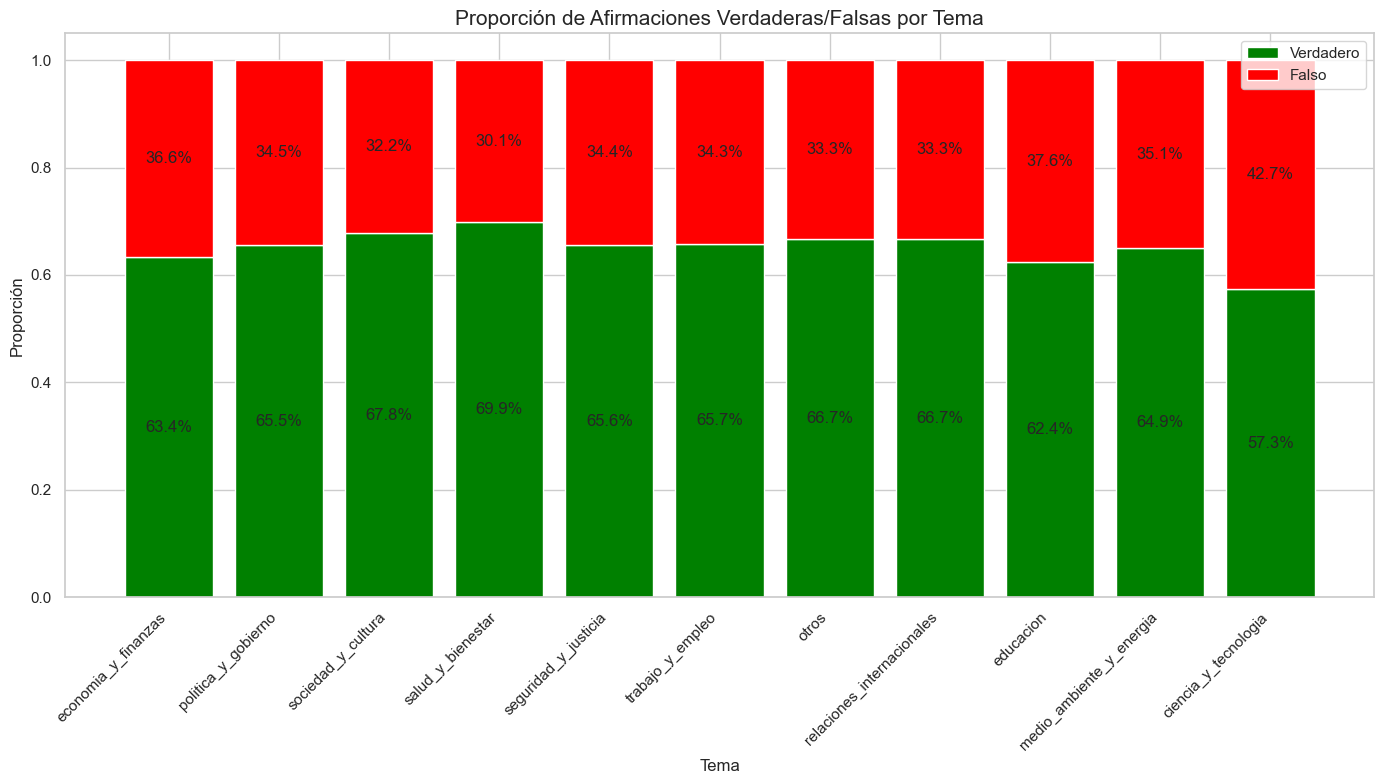

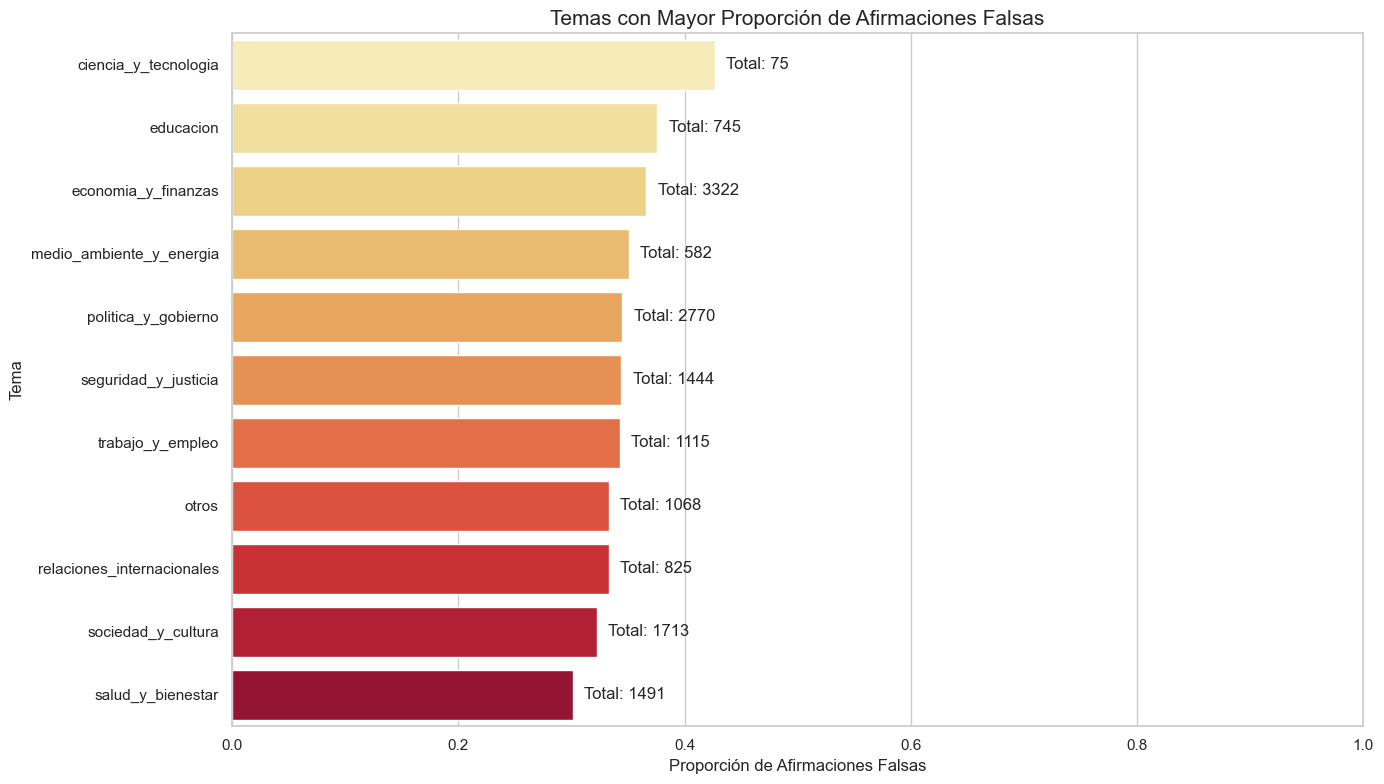

In [97]:
# Visualizar la relación entre subject_categories y label
# Verificar si hay columnas que comienzan con 'subject-'
subject_cols = [col for col in train_data.columns if col.startswith('subject-')]

if subject_cols:
    # Visualizar temas individuales en lugar de combinaciones
    subject_stats_df = plot_individual_subjects(train_data, subject_cols, top_n=15)
    
    # También mantenemos el análisis de la proporción de afirmaciones falsas
    # Visualizar los temas con mayor proporción de afirmaciones falsas
    plt.figure(figsize=(14, 8))
    top_subjects = subject_stats_df.sort_values('false_ratio', ascending=False).head(15)
    
    # Versión corregida: usar hue junto con palette o usar directamente el color
    sns.barplot(x='false_ratio', y='subject', hue='subject', data=top_subjects, palette='YlOrRd', legend=False)
    
    plt.title('Temas con Mayor Proporción de Afirmaciones Falsas', fontsize=15)
    plt.xlabel('Proporción de Afirmaciones Falsas', fontsize=12)
    plt.ylabel('Tema', fontsize=12)
    
    # Añadir etiquetas con el conteo total
    for i, row in enumerate(top_subjects.itertuples()):
        plt.text(row.false_ratio + 0.01, i, f'Total: {row.total_count}', va='center')
    
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron columnas de temas (subject-) en el conjunto de datos.")

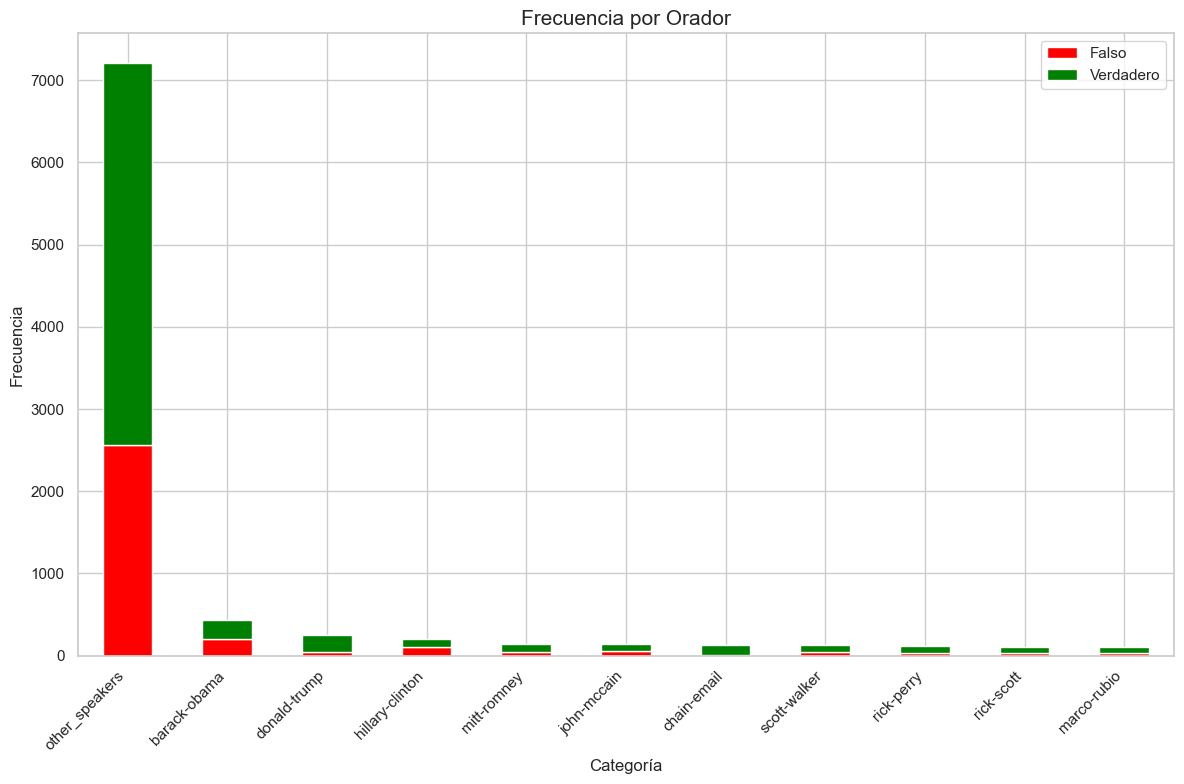

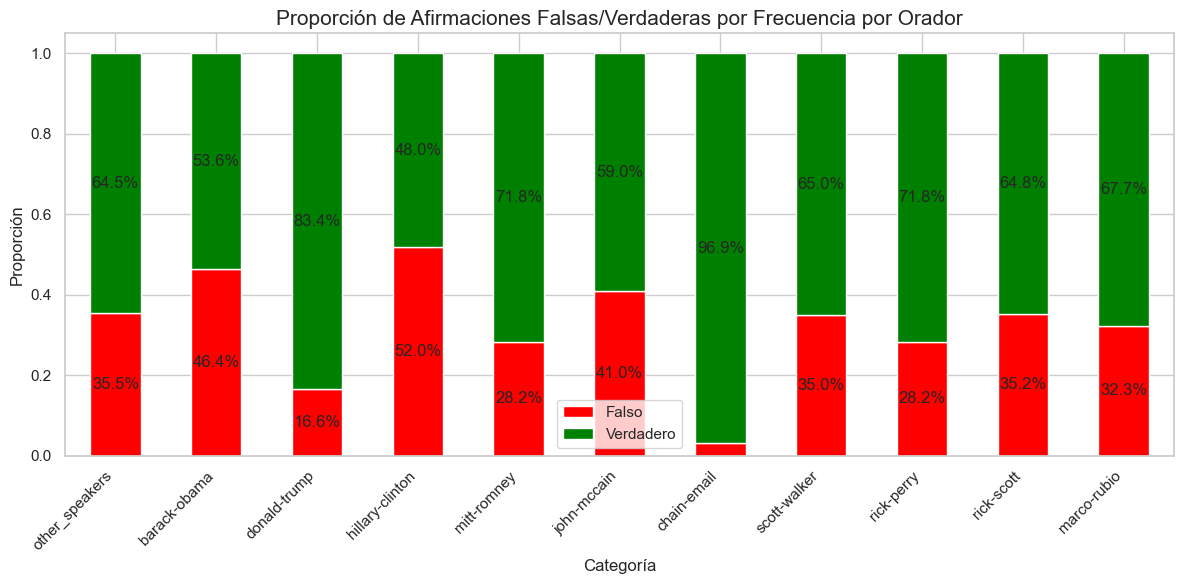

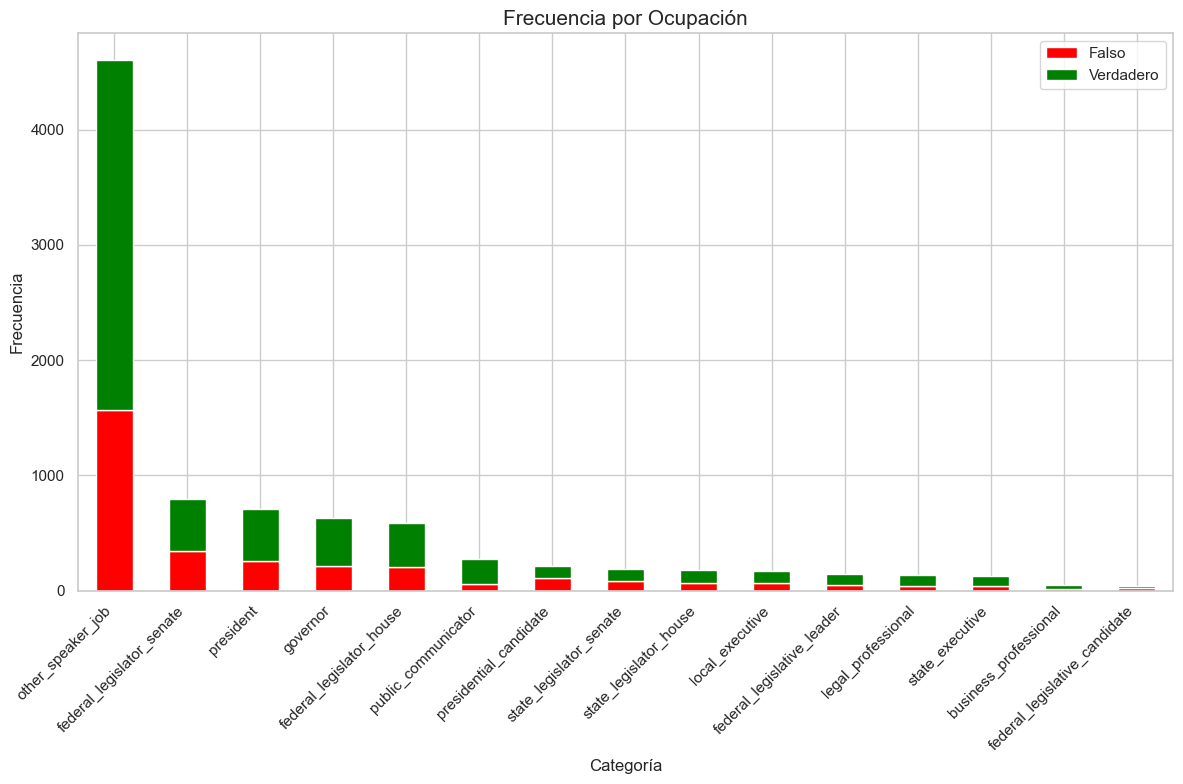

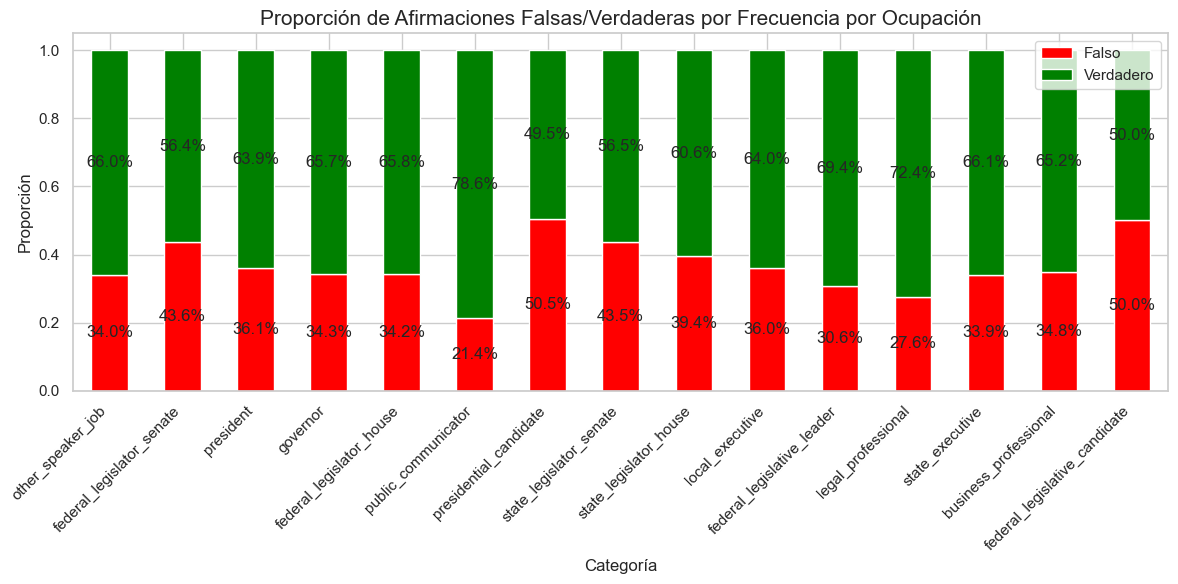

In [123]:
# Visualizar la relación entre speaker_grouped y label
if 'speaker_grouped' in train_data.columns:
    speaker_pivot = plot_categorical_by_label(train_data, 'speaker_grouped', 'Frecuencia por Orador', top_n=15)
else:
    print("La columna 'speaker_grouped' no existe en el conjunto de datos.")

# Visualizar la relación entre speaker_job_grouped y label
if 'speaker_job_grouped' in train_data.columns:
    job_pivot = plot_categorical_by_label(train_data, 'speaker_job_grouped', 'Frecuencia por Ocupación', top_n=15)
else:
    print("La columna 'speaker_job_grouped' no existe en el conjunto de datos.")

# 8. Distribucion Geografica de los Datos
En esta sección, analizaremos la distribución geográfica de las afirmaciones verdaderas y falsas.

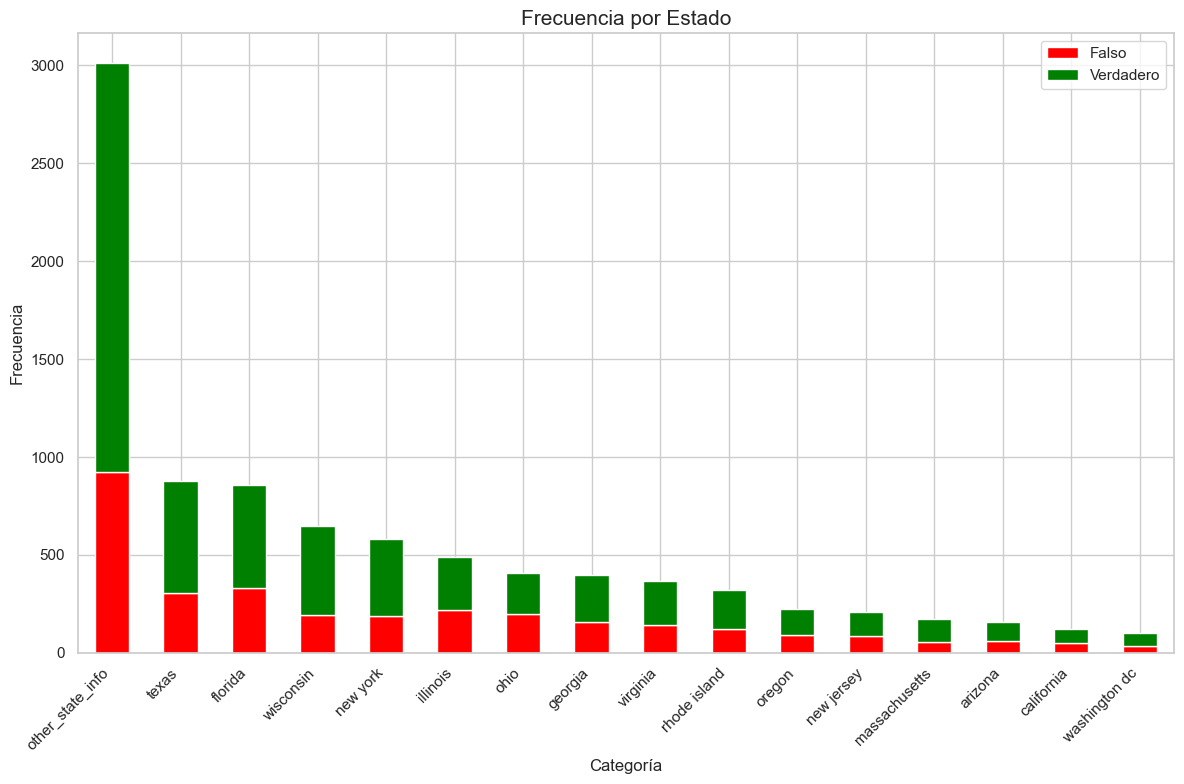

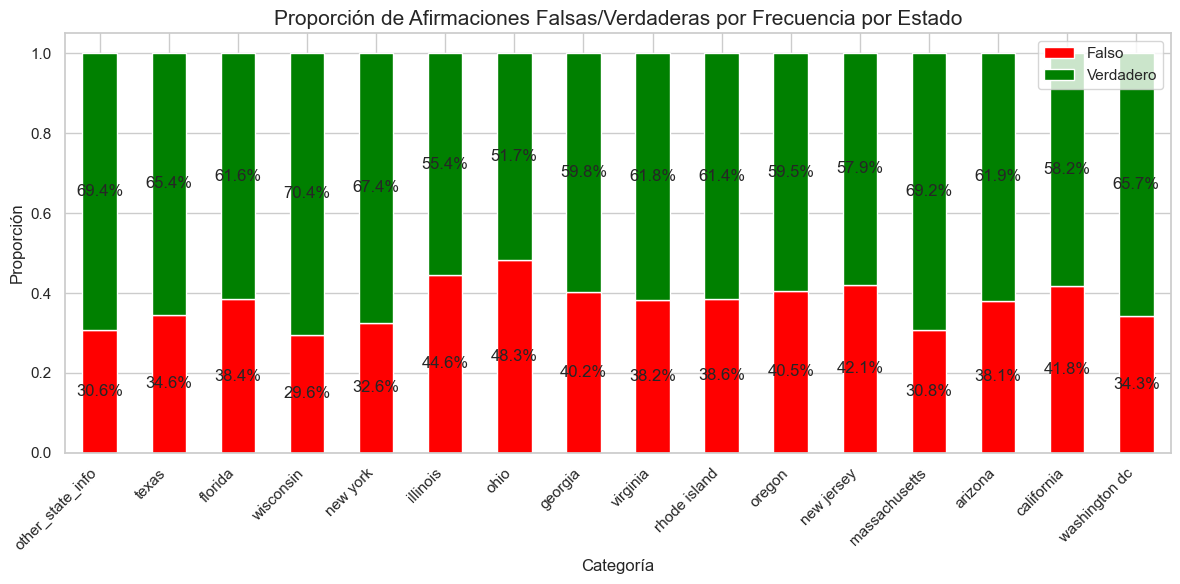

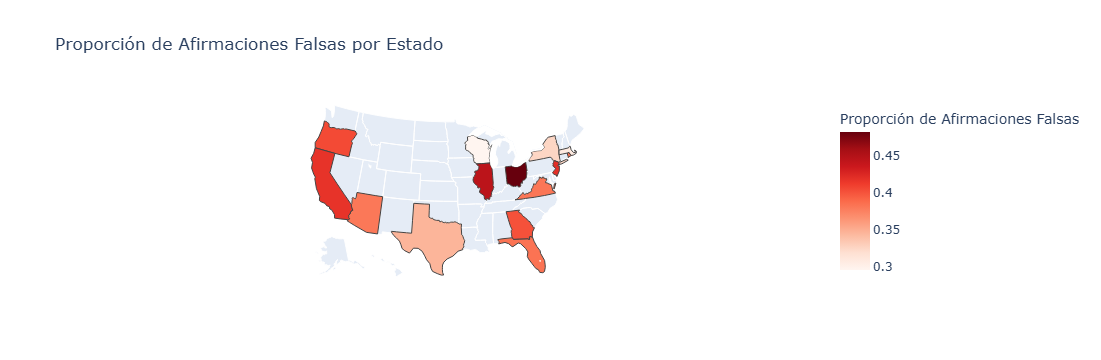

In [101]:
# Visualizar la relación entre state_info_grouped y label
if 'state_info_grouped' in train_data.columns:
    state_pivot = plot_categorical_by_label(train_data, 'state_info_grouped', 'Frecuencia por Estado', top_n=20)
    
    # Crear un DataFrame con estadísticas por estado
    state_stats = []
    for state in train_data['state_info_grouped'].unique():
        state_data = train_data[train_data['state_info_grouped'] == state]
        false_count = state_data[state_data['label'] == 0].shape[0]
        true_count = state_data[state_data['label'] == 1].shape[0]
        total_count = false_count + true_count
        false_ratio = false_count / total_count if total_count > 0 else 0
        
        state_stats.append({
            'state': state,
            'false_count': false_count,
            'true_count': true_count,
            'total_count': total_count,
            'false_ratio': false_ratio
        })
    
    state_stats_df = pd.DataFrame(state_stats)
    state_stats_df = state_stats_df.sort_values('total_count', ascending=False)
    
    # Crear un mapa de calor para visualizar la proporción de afirmaciones falsas por estado
    # Primero, necesitamos un diccionario de mapeo de estados a códigos de estado
    state_mapping = {
        'texas': 'TX',
        'florida': 'FL',
        'wisconsin': 'WI',
        'new york': 'NY',
        'illinois': 'IL',
        'ohio': 'OH',
        'georgia': 'GA',
        'virginia': 'VA',
        'rhode island': 'RI',
        'new jersey': 'NJ',
        'oregon': 'OR',
        'massachusetts': 'MA',
        'arizona': 'AZ',
        'california': 'CA',
        'washington dc': 'DC',
        'vermont': 'VT',
        'new hampshire': 'NH',
        'pennsylvania': 'PA',
        'other_state_info': 'Unknown'
    }
    
    # Mapear los nombres de estados a códigos
    state_stats_df['state_code'] = state_stats_df['state'].map(lambda s: state_mapping.get(s.lower(), s))
    
    # Crear un mapa de calor usando Plotly
    fig = px.choropleth(
        state_stats_df,
        locations='state_code',
        color='false_ratio',
        hover_name='state',
        locationmode='USA-states',
        scope='usa',
        color_continuous_scale='Reds',
        labels={'false_ratio': 'Proporción de Afirmaciones Falsas'},
        title='Proporción de Afirmaciones Falsas por Estado'
    )
    
    # Añadir información del conteo total
    fig.update_traces(hovertemplate='<b>%{hovertext}</b><br>Proporción Falsas: %{z:.2f}<br>Total: %{customdata}')
    fig.update_traces(customdata=state_stats_df['total_count'])
    
    fig.show()
else:
    print("La columna 'state_info_grouped' no existe en el conjunto de datos.")

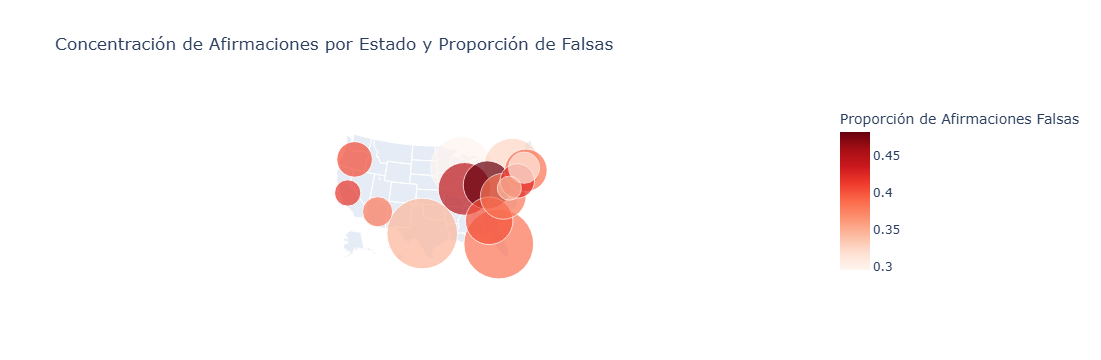

In [103]:
# Crear un mapa de burbujas para mostrar la concentración de afirmaciones por estado
if 'state_info_grouped' in train_data.columns:
    # Filtrar solo estados de EE. UU. (excluir 'other_state_info') y crear una copia explícita
    us_state_stats = state_stats_df[state_stats_df['state'] != 'other_state_info'].copy()
    
    # Coordenadas centroide aproximadas de estados para colocar burbujas
    state_coordinates = {
        'texas': (31.0, -100.0),
        'florida': (28.0, -82.0),
        'wisconsin': (44.5, -89.5),
        'new york': (43.0, -75.0),
        'illinois': (40.0, -89.0),
        'ohio': (40.3, -82.7),
        'georgia': (33.0, -83.5),
        'virginia': (37.5, -79.0),
        'rhode island': (41.7, -71.5),
        'new jersey': (40.0, -74.5),
        'oregon': (44.0, -120.5),
        'massachusetts': (42.3, -71.8),
        'arizona': (34.5, -111.5),
        'california': (37.0, -120.0),
        'washington dc': (38.9, -77.0),
        'vermont': (44.0, -72.7),
        'new hampshire': (43.7, -71.5),
        'pennsylvania': (41.2, -77.2),
        # Añadir más estados según sea necesario
    }
    
    # Añadir coordenadas al DataFrame usando .loc
    us_state_stats.loc[:, 'latitude'] = us_state_stats['state'].map(lambda s: state_coordinates.get(s.lower(), (0, 0))[0])
    us_state_stats.loc[:, 'longitude'] = us_state_stats['state'].map(lambda s: state_coordinates.get(s.lower(), (0, 0))[1])
    
    # Filtrar solo estados con coordenadas conocidas
    us_state_stats = us_state_stats[(us_state_stats['latitude'] != 0) & (us_state_stats['longitude'] != 0)]
    
    # Crear el mapa de burbujas
    fig = px.scatter_geo(
        us_state_stats,
        lat='latitude',
        lon='longitude',
        size='total_count',
        color='false_ratio',
        hover_name='state',
        scope='usa',
        size_max=50,
        color_continuous_scale='Reds',
        labels={'false_ratio': 'Proporción de Afirmaciones Falsas', 'total_count': 'Total de Afirmaciones'},
        title='Concentración de Afirmaciones por Estado y Proporción de Falsas'
    )
    
    fig.show()
else:
    print("La columna 'state_info_grouped' no existe en el conjunto de datos.")

# 9. Analisis de Afiliacion Politica
En esta sección, exploraremos visualmente la relación entre la afiliación política y la veracidad de las afirmaciones.

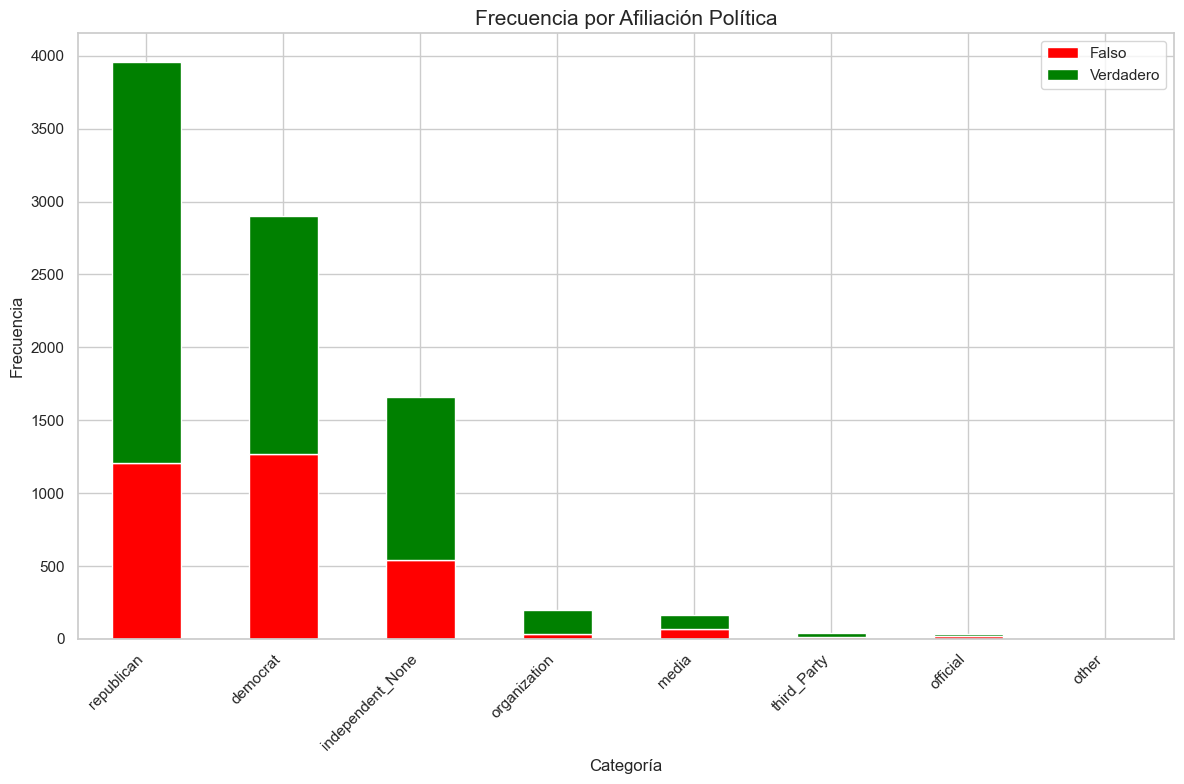

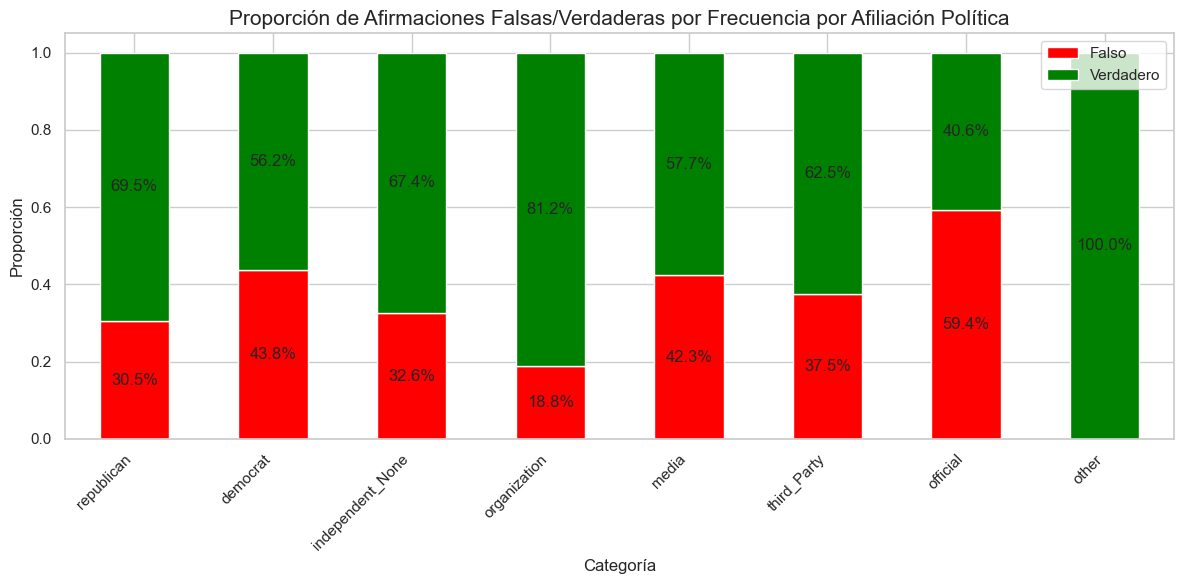

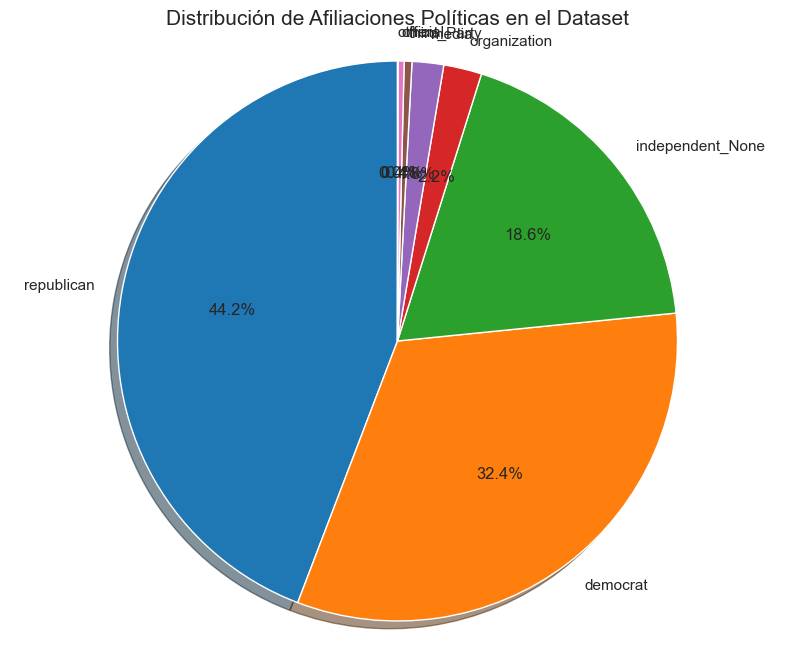

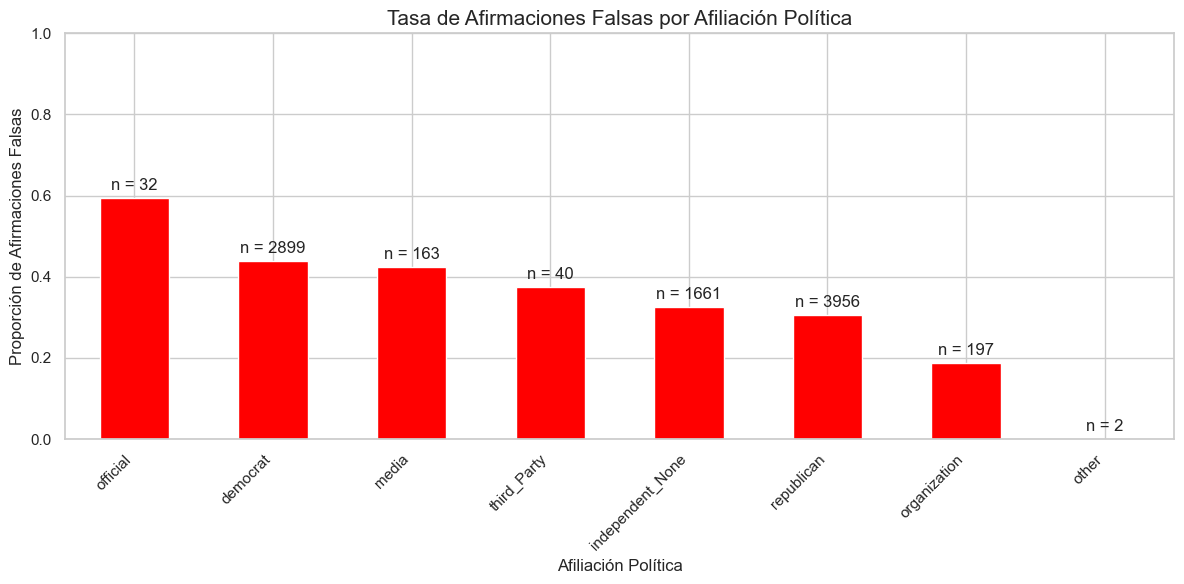

In [106]:
# Visualizar la relación entre party_group y label
if 'party_group' in train_data.columns:
    party_pivot = plot_categorical_by_label(train_data, 'party_group', 'Frecuencia por Afiliación Política')
    
    # Crear un gráfico circular que muestre la distribución de afiliaciones políticas
    party_counts = train_data['party_group'].value_counts()
    plt.figure(figsize=(10, 8))
    plt.pie(party_counts, labels=party_counts.index, autopct='%1.1f%%', 
            shadow=True, startangle=90, colors=plt.cm.tab10.colors)
    plt.axis('equal')
    plt.title('Distribución de Afiliaciones Políticas en el Dataset', fontsize=15)
    plt.show()
    
    # Analizar la tasa de afirmaciones falsas por partido político
    party_false_rate = train_data.groupby('party_group')['label'].apply(
        lambda x: (x == 0).mean()
    ).sort_values(ascending=False)
    
    plt.figure(figsize=(12, 6))
    party_false_rate.plot(kind='bar', color='red')
    plt.title('Tasa de Afirmaciones Falsas por Afiliación Política', fontsize=15)
    plt.xlabel('Afiliación Política', fontsize=12)
    plt.ylabel('Proporción de Afirmaciones Falsas', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)
    
    # Añadir etiquetas con el conteo total
    party_total_counts = train_data['party_group'].value_counts()
    for i, party in enumerate(party_false_rate.index):
        total = party_total_counts[party]
        plt.text(i, party_false_rate[party] + 0.02, f'n = {total}', ha='center')
    
    plt.tight_layout()
    plt.show()
else:
    print("La columna 'party_group' no existe en el conjunto de datos.")

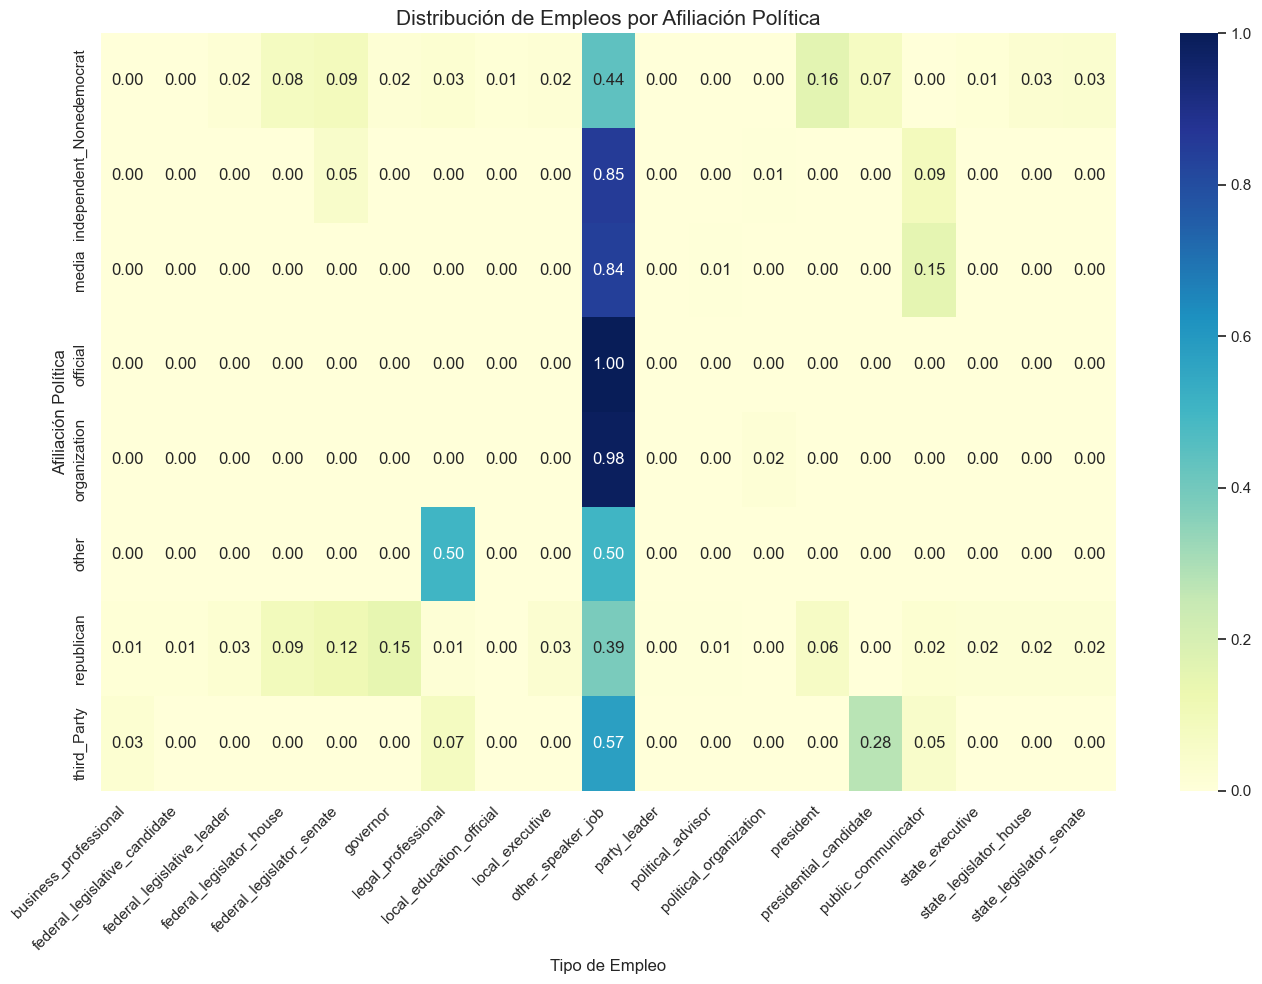

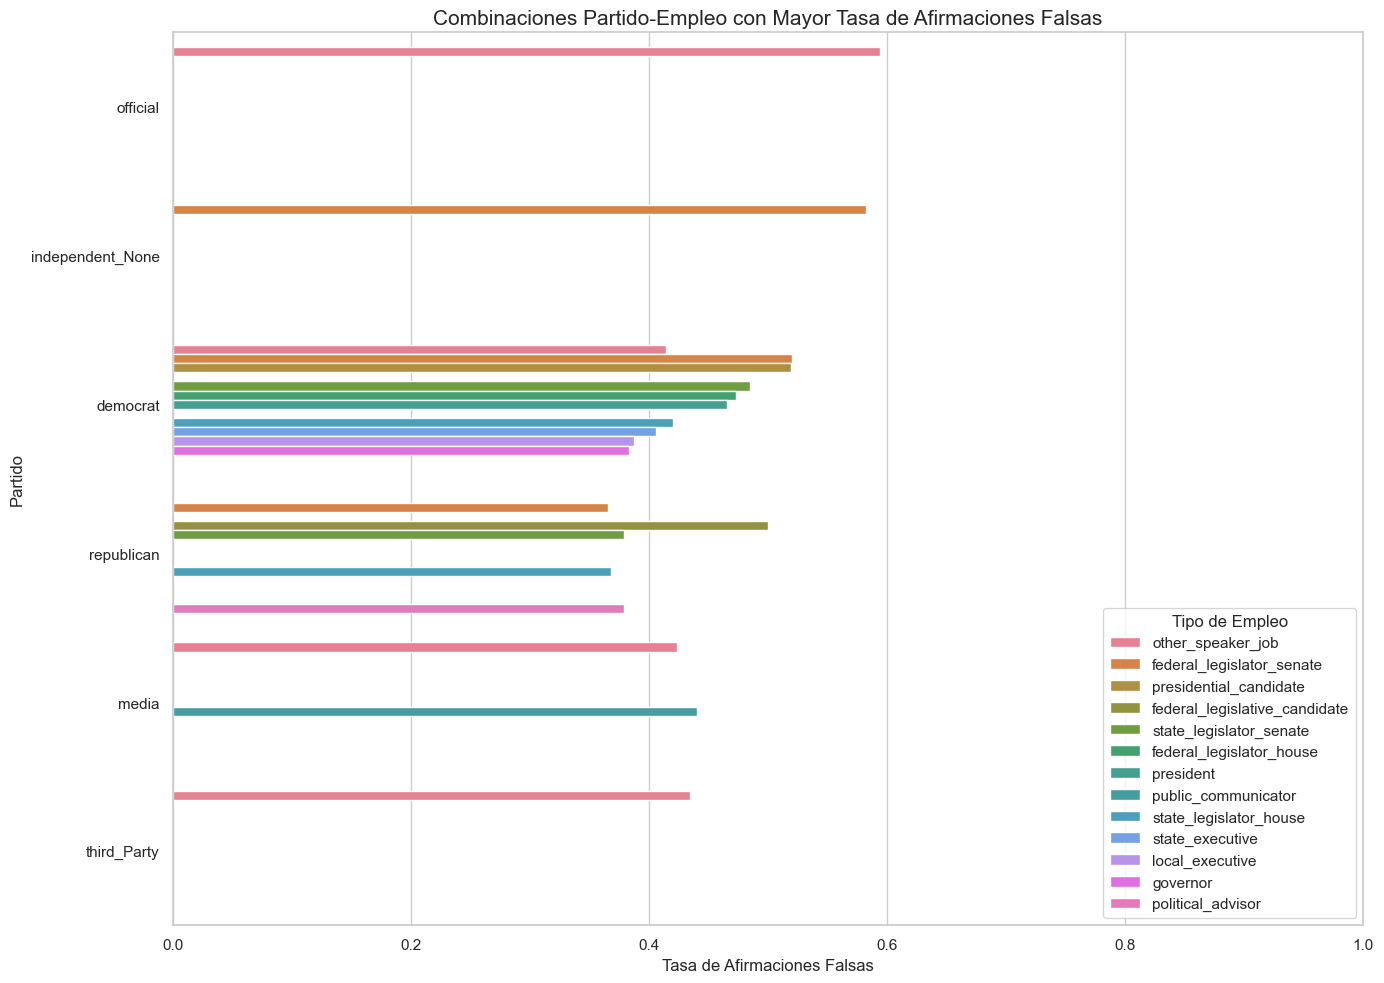

In [108]:
# Análisis combinado de partido político y tipo de empleo
if 'party_group' in train_data.columns and 'speaker_job_grouped' in train_data.columns:
    # Crear una tabla de contingencia
    cross_tab = pd.crosstab(
        train_data['party_group'], 
        train_data['speaker_job_grouped'],
        normalize='index'
    )
    
    # Visualizar con un heatmap
    plt.figure(figsize=(14, 10))
    sns.heatmap(cross_tab, cmap='YlGnBu', annot=True, fmt='.2f')
    plt.title('Distribución de Empleos por Afiliación Política', fontsize=15)
    plt.xlabel('Tipo de Empleo', fontsize=12)
    plt.ylabel('Afiliación Política', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Análisis de la tasa de afirmaciones falsas por combinación partido-empleo
    grouped_false_rate = train_data.groupby(['party_group', 'speaker_job_grouped'])['label'].apply(
        lambda x: (x == 0).mean() if len(x) >= 20 else None
    ).dropna().reset_index()
    grouped_false_rate.columns = ['Partido', 'Empleo', 'Tasa Falsas']
    
    # Ordenar y visualizar las combinaciones con mayor tasa de falsedad
    grouped_false_rate = grouped_false_rate.sort_values('Tasa Falsas', ascending=False)
    
    plt.figure(figsize=(14, 10))
    sns.barplot(x='Tasa Falsas', y='Partido', hue='Empleo', data=grouped_false_rate.head(20))
    plt.title('Combinaciones Partido-Empleo con Mayor Tasa de Afirmaciones Falsas', fontsize=15)
    plt.xlabel('Tasa de Afirmaciones Falsas', fontsize=12)
    plt.ylabel('Partido', fontsize=12)
    plt.xlim(0, 1)
    plt.legend(title='Tipo de Empleo', loc='lower right')
    plt.tight_layout()
    plt.show()
else:
    print("Las columnas necesarias no existen en el conjunto de datos.")

# 10. Correlacion entre Variables y la Prediccion
En esta última sección, analizaremos la correlación entre las diferentes variables numéricas y la variable objetivo.

In [113]:
# Seleccionar solo las columnas numéricas
numeric_cols = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Si hay muchas columnas, seleccionar solo las más interesantes
if len(numeric_cols) > 15:
    # Añadir la columna 'label' a las columnas seleccionadas
    if 'label' in numeric_cols:
        numeric_cols.remove('label')
    
    # Calcular la correlación con 'label'
    corr_with_label = train_data[numeric_cols].corrwith(train_data['label']).abs().sort_values(ascending=False)
    
    # Seleccionar las top 15 columnas más correlacionadas con 'label'
    top_cols = corr_with_label.head(15).index.tolist()
    selected_cols = ['label'] + top_cols
    
    # Mostrar las correlaciones top
    print("Top columnas con mayor correlación absoluta con 'label':")
    print(corr_with_label.head(15))
else:
    selected_cols = numeric_cols

# Asegurarse de que 'label' esté en las columnas seleccionadas
if 'label' not in selected_cols and 'label' in train_data.columns:
    selected_cols = ['label'] + selected_cols

Top columnas con mayor correlación absoluta con 'label':
party_affiliation_cod-llm             0.126064
party_group_cod                       0.106078
state_info_grouped_cod                0.058899
state_info_cod-llm                    0.051963
subject-salud_y_bienestar             0.048077
speaker_job_cod-llm                   0.031847
subject-sociedad_y_cultura            0.030828
subject-economia_y_finanzas           0.022243
subject-otros                         0.014778
subject-educacion                     0.014711
subject-ciencia_y_tecnologia          0.014268
subject-relaciones_internacionales    0.012793
subject-politica_y_gobierno           0.010353
statement_length                      0.008792
subject-trabajo_y_empleo              0.007827
dtype: float64


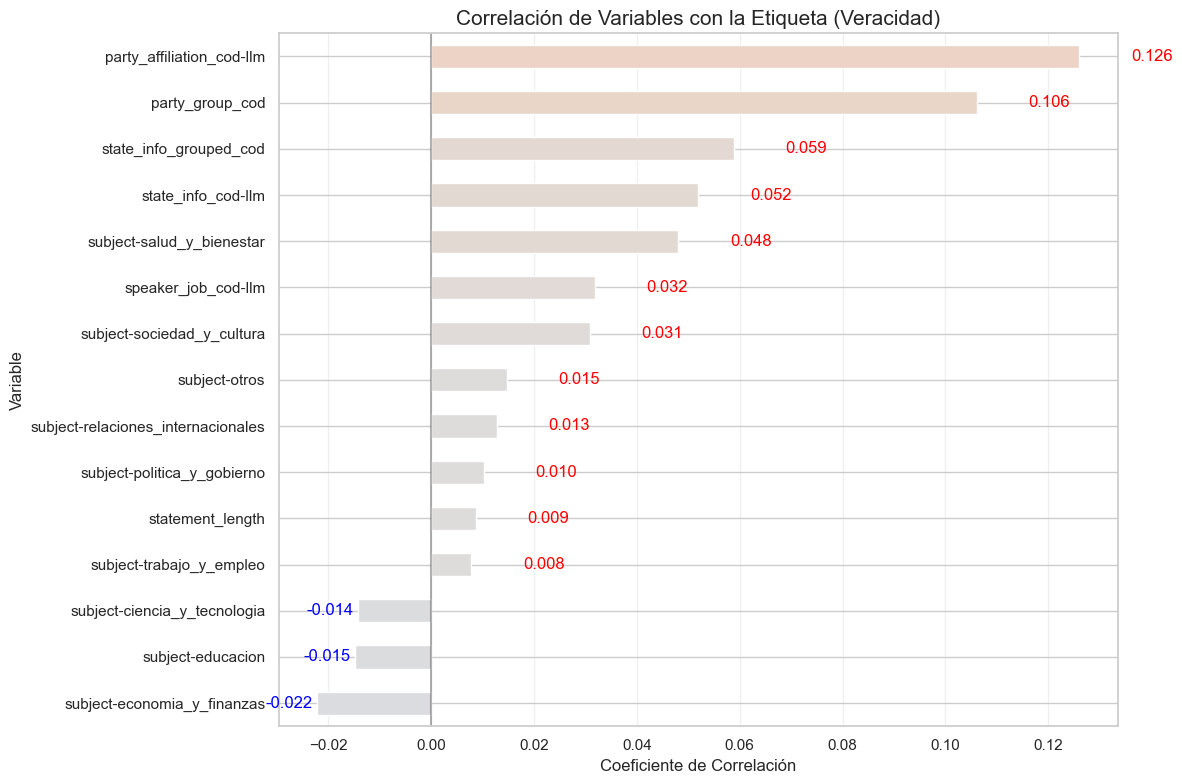

In [115]:
# Crear un gráfico de barras para mostrar las correlaciones con la variable objetivo
if selected_cols and 'label' in train_data.columns:
    correlations = train_data[selected_cols].corrwith(train_data['label'])
    correlations = correlations.drop('label', errors='ignore')  # Eliminar la autocorrelación
    correlations = correlations.sort_values()
    
    plt.figure(figsize=(12, 8))
    correlations.plot(kind='barh', color=plt.cm.coolwarm(
        (correlations.values + 1) / 2)  # Mapear de [-1, 1] a [0, 1] para el colormap
    )
    plt.title('Correlación de Variables con la Etiqueta (Veracidad)', fontsize=15)
    plt.xlabel('Coeficiente de Correlación', fontsize=12)
    plt.ylabel('Variable', fontsize=12)
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    plt.grid(axis='x', alpha=0.3)
    
    # Añadir valores al gráfico
    for i, v in enumerate(correlations.values):
        color = 'blue' if v < 0 else 'red'
        plt.text(v + np.sign(v) * 0.01, i, f'{v:.3f}', color=color, va='center')
    
    plt.tight_layout()
    plt.show()
else:
    print("No se pudo crear el gráfico de correlaciones con 'label'.")

# 11. Conclusiones

1. **Balance de clases**: El conjunto de datos presenta un desequilibrio significativo entre afirmaciones verdaderas y falsas, lo que deberá tenerse en cuenta al desarrollar modelos de clasificación.

2. **Características textuales**: Hay patrones lingüísticos diferenciados entre afirmaciones verdaderas y falsas, tanto en longitud como en elección de palabras.

3. **Entidades nombradas**: El análisis NER ha revelado diferencias en las entidades mencionadas entre afirmaciones verdaderas y falsas.

4. **Sentimientos**: Existe una correlación entre la polaridad del sentimiento y la veracidad de las afirmaciones.

5. **Categorías temáticas**: Ciertos temas presentan una mayor proporción de afirmaciones falsas.

6. **Distribución geográfica**: Se han identificado patrones regionales en la proporción de afirmaciones falsas.

7. **Afiliación política**: Las afirmaciones falsas no se distribuyen uniformemente entre las diferentes afiliaciones políticas.

8. **Correlaciones**: Se han identificado variables con correlación significativa con la veracidad de las afirmaciones.

# 12. Referencias

En este proyecto de visualización de datos, hemos utilizado varias librerías de Python especializadas en análisis y visualización de datos. A continuación, se describe brevemente cada una:

## Librerías principales para análisis de datos

- **Pandas**: Una biblioteca fundamental para manipulación y análisis de datos en Python. Proporciona estructuras de datos eficientes como DataFrames que facilitan la limpieza, transformación y análisis de datos tabulares.

- **NumPy**: Biblioteca para computación científica que proporciona soporte para vectores y matrices multidimensionales, junto con una amplia colección de funciones matemáticas para operar con estas estructuras.

## Librerías para visualización estática

- **Matplotlib**: Biblioteca de visualización tradicional en Python, utilizada como base para crear gráficos estáticos de alta calidad. Proporciona un control detallado sobre cada aspecto del gráfico.

- **Seaborn**: Construida sobre Matplotlib, ofrece una interfaz de alto nivel para crear visualizaciones estadísticas atractivas. Facilita la creación de visualizaciones complejas y estéticamente agradables con menos código.

## Visualizaciones interactivas

- **Plotly**: Biblioteca que permite crear visualizaciones interactivas de calidad web. Hemos utilizado:
  - `plotly.express`: API simplificada para crear rápidamente gráficos interactivos comunes.
  - `plotly.graph_objects`: API de nivel inferior que proporciona mayor control sobre las visualizaciones.
  - `plotly.subplots`: Para crear diseños con múltiples gráficos.

## Librerías para procesamiento de texto

- **WordCloud**: Especializada en la generación de nubes de palabras, donde el tamaño de cada palabra representa su frecuencia.

- **re (Regular Expressions)**: Módulo estándar de Python para trabajar con expresiones regulares, utilizado para el procesamiento y extracción de patrones en texto.

- **Collections (Counter)**: Proporciona la clase Counter que facilita el conteo de elementos y la obtención de las palabras más frecuentes.

## Visualización geoespacial

- **GeoPandas**: Extensión de Pandas para trabajar con datos geoespaciales, facilitando operaciones con archivos de formas (shapefiles) y otras fuentes de datos geoespaciales.

- **Folium**: Biblioteca que permite crear mapas interactivos basados en Leaflet.js directamente desde Python.

## Bibliotecas estadísticas

- **SciPy**: Utilizada para realizar pruebas estadísticas (como la prueba t de Student) para comparar distribuciones entre grupos.

Estas herramientas combinadas nos han permitido realizar un análisis exhaustivo y visualmente atractivo de los datos relacionados con la detección de afirmaciones políticas falsas.